In [1]:
#Importar bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

import skfda

from skfda.ml.clustering import KMeans

In [2]:
# Ler ficheiros

TabelaTempo=pd.read_excel("C:/Users/Guilherme/Desktop/KcTime.xlsx")
TabelaNDVI=pd.read_excel("C:/Users/Guilherme/Desktop/KcNDVI.xlsx")
TabelaGirassol=pd.read_csv("C:/Users/Guilherme/Desktop/CulturasCordBOM/dfGIRASSOL (Sequeiro).csv")

In [3]:
TabelaGirassol.head()

,ID,DATA,Cultura,NDVI_MED,Lat,Lon
0,1746371,2020-09-01,GIRASSOL (Sequeiro),0.2415,39.414462,-8.518417
1,1746371,2020-09-06,GIRASSOL (Sequeiro),0.2327,39.414462,-8.518417
2,1746371,2020-09-11,GIRASSOL (Sequeiro),0.1315,39.414462,-8.518417
3,1746371,2020-09-16,GIRASSOL (Sequeiro),0.1295,39.414462,-8.518417
4,1746371,2020-09-21,GIRASSOL (Sequeiro),0.1279,39.414462,-8.518417


In [4]:
#apenas para o artigo
TabelaGirassolartigo= TabelaGirassol.rename({'DATA': 'DATE', 'Cultura': 'Crop'}, axis=1) 

In [5]:
TabelaGirassolartigo

,ID,DATE,Crop,NDVI_MED,Lat,Lon
0,1746371,2020-09-01,GIRASSOL (Sequeiro),0.2415,39.414462,-8.518417
1,1746371,2020-09-06,GIRASSOL (Sequeiro),0.2327,39.414462,-8.518417
2,1746371,2020-09-11,GIRASSOL (Sequeiro),0.1315,39.414462,-8.518417
3,1746371,2020-09-16,GIRASSOL (Sequeiro),0.1295,39.414462,-8.518417
4,1746371,2020-09-21,GIRASSOL (Sequeiro),0.1279,39.414462,-8.518417
...,...,...,...,...,...,...
16337,43784351,2022-01-04,GIRASSOL (Sequeiro),0.2995,39.322656,-8.561264
16338,43784351,2022-01-09,GIRASSOL (Sequeiro),0.3240,39.322656,-8.561264
16339,43784351,2022-01-14,GIRASSOL (Sequeiro),0.3485,39.322656,-8.561264
16340,43784351,2022-01-19,GIRASSOL (Sequeiro),0.3729,39.322656,-8.561264


In [6]:
TabelaGirassolartigo

,ID,DATE,Crop,NDVI_MED,Lat,Lon
0,1746371,2020-09-01,GIRASSOL (Sequeiro),0.2415,39.414462,-8.518417
1,1746371,2020-09-06,GIRASSOL (Sequeiro),0.2327,39.414462,-8.518417
2,1746371,2020-09-11,GIRASSOL (Sequeiro),0.1315,39.414462,-8.518417
3,1746371,2020-09-16,GIRASSOL (Sequeiro),0.1295,39.414462,-8.518417
4,1746371,2020-09-21,GIRASSOL (Sequeiro),0.1279,39.414462,-8.518417
...,...,...,...,...,...,...
16337,43784351,2022-01-04,GIRASSOL (Sequeiro),0.2995,39.322656,-8.561264
16338,43784351,2022-01-09,GIRASSOL (Sequeiro),0.3240,39.322656,-8.561264
16339,43784351,2022-01-14,GIRASSOL (Sequeiro),0.3485,39.322656,-8.561264
16340,43784351,2022-01-19,GIRASSOL (Sequeiro),0.3729,39.322656,-8.561264


In [7]:
TabelaGirassolartigo.set_index(["ID","DATE"]).sort_index()

Crop  NDVI_MED        Lat       Lon
ID       DATE                                                          
1746371  2020-09-01  GIRASSOL (Sequeiro)    0.2415  39.414462 -8.518417
         2020-09-06  GIRASSOL (Sequeiro)    0.2327  39.414462 -8.518417
         2020-09-11  GIRASSOL (Sequeiro)    0.1315  39.414462 -8.518417
         2020-09-16  GIRASSOL (Sequeiro)    0.1295  39.414462 -8.518417
         2020-09-21  GIRASSOL (Sequeiro)    0.1279  39.414462 -8.518417
...                                  ...       ...        ...       ...
44791951 2022-01-04  GIRASSOL (Sequeiro)    0.3844  39.343047 -8.611480
         2022-01-09  GIRASSOL (Sequeiro)    0.3979  39.343047 -8.611480
         2022-01-14  GIRASSOL (Sequeiro)    0.4114  39.343047 -8.611480
         2022-01-19  GIRASSOL (Sequeiro)    0.4263  39.343047 -8.611480
         2022-01-24  GIRASSOL (Sequeiro)    0.3784  39.343047 -8.611480

[16342 rows x 4 columns]

In [8]:
TabelaGirassolartigo

,ID,DATE,Crop,NDVI_MED,Lat,Lon
0,1746371,2020-09-01,GIRASSOL (Sequeiro),0.2415,39.414462,-8.518417
1,1746371,2020-09-06,GIRASSOL (Sequeiro),0.2327,39.414462,-8.518417
2,1746371,2020-09-11,GIRASSOL (Sequeiro),0.1315,39.414462,-8.518417
3,1746371,2020-09-16,GIRASSOL (Sequeiro),0.1295,39.414462,-8.518417
4,1746371,2020-09-21,GIRASSOL (Sequeiro),0.1279,39.414462,-8.518417
...,...,...,...,...,...,...
16337,43784351,2022-01-04,GIRASSOL (Sequeiro),0.2995,39.322656,-8.561264
16338,43784351,2022-01-09,GIRASSOL (Sequeiro),0.3240,39.322656,-8.561264
16339,43784351,2022-01-14,GIRASSOL (Sequeiro),0.3485,39.322656,-8.561264
16340,43784351,2022-01-19,GIRASSOL (Sequeiro),0.3729,39.322656,-8.561264


In [9]:
TabelaGirassol

,ID,DATA,Cultura,NDVI_MED,Lat,Lon
0,1746371,2020-09-01,GIRASSOL (Sequeiro),0.2415,39.414462,-8.518417
1,1746371,2020-09-06,GIRASSOL (Sequeiro),0.2327,39.414462,-8.518417
2,1746371,2020-09-11,GIRASSOL (Sequeiro),0.1315,39.414462,-8.518417
3,1746371,2020-09-16,GIRASSOL (Sequeiro),0.1295,39.414462,-8.518417
4,1746371,2020-09-21,GIRASSOL (Sequeiro),0.1279,39.414462,-8.518417
...,...,...,...,...,...,...
16337,43784351,2022-01-04,GIRASSOL (Sequeiro),0.2995,39.322656,-8.561264
16338,43784351,2022-01-09,GIRASSOL (Sequeiro),0.3240,39.322656,-8.561264
16339,43784351,2022-01-14,GIRASSOL (Sequeiro),0.3485,39.322656,-8.561264
16340,43784351,2022-01-19,GIRASSOL (Sequeiro),0.3729,39.322656,-8.561264


In [10]:
TabelaGirassol.ID.value_counts()

37473549    103
28005284    103
5606264     103
30966744    103
44473938    103
           ... 
8195361      96
5935649      96
5935647      96
5794428      96
43784351     96
Name: ID, Length: 168, dtype: int64

In [11]:
type(TabelaGirassol.ID.value_counts())

pandas.core.series.Series

In [12]:
TabelaGirassol.ID.values

array([ 1746371,  1746371,  1746371, ..., 43784351, 43784351, 43784351],
      dtype=int64)

In [13]:
TabelaGirassol.ID.value_counts()[:12]

37473549    103
28005284    103
5606264     103
30966744    103
44473938    103
44476361    103
44476359    103
36305238    103
42775848    103
41128098    103
5606972     103
35403490    103
Name: ID, dtype: int64

In [14]:
TabelaGirassol.ID.value_counts().index[:12]

Int64Index([37473549, 28005284,  5606264, 30966744, 44473938, 44476361,
            44476359, 36305238, 42775848, 41128098,  5606972, 35403490],
           dtype='int64')

In [15]:
listateste=list(TabelaGirassol.ID.value_counts().index[:12])

In [16]:
listateste

[37473549,
 28005284,
 5606264,
 30966744,
 44473938,
 44476361,
 44476359,
 36305238,
 42775848,
 41128098,
 5606972,
 35403490]

In [17]:
#Remoção de séries erradas
TabelaGirassol= TabelaGirassol[~TabelaGirassol.ID.isin(listateste)]

In [18]:
TabelaGirassol.ID.value_counts()

1746371     97
42251786    97
42192473    97
42192471    97
40607918    97
            ..
8195361     96
5935649     96
5935647     96
5794428     96
43784351    96
Name: ID, Length: 156, dtype: int64

In [19]:
TabelaTempo.head()

,Crop,Init. (Lini),Dev. (Ldev),Mid (Lmid),Late (Llate),Total,Plant Date
0,Broculos,35,45,40,15,135,Set
1,Couve_repolho,40,60,50,15,165,Set
2,Cenoura,30,40,60,20,150,Feb_Mar
3,Couveflor,35,50,40,15,140,Set
4,Salsao_aipo,25,40,45,15,125,Abr


In [20]:
TabelaNDVI.head()

,Crop,Kc ini,Kc mid,Kc end
0,Broculos,0.7,1.05,0.95
1,Couve_repolho,0.7,1.05,0.95
2,Cenoura,0.7,1.05,0.95
3,Couveflor,0.7,1.05,0.95
4,Salsao_aipo,0.7,1.05,1.00


In [21]:
TabelaGirassol=TabelaGirassol.drop("Cultura", axis=1)

In [22]:
TabelaGirassol2=TabelaGirassol.set_index(["ID","DATA"]).sort_index()

In [23]:
# Representacao de todas as series/poligonos (apenas para verificacao)
pio.renderers.default = 'iframe'
px.line(
    TabelaGirassol2.reset_index(),
    x="DATA",
    y="NDVI_MED",
    color="ID",
).update_layout(xaxis={"type": "category"},xaxis_title="DATE",yaxis_title="NDVI")

In [24]:
TabelaGirassol3=TabelaGirassol2.reset_index()

In [30]:
# A mesma representacao anterior
TabelaGirassol3.set_index("DATA", inplace=True)
#TabelaGirassol3.groupby("ID")["NDVI_MED"].plot(legend=True, xlabel="DATA", ylabel="NDVI_MED",figsize=(8,6))

In [31]:
TabelaGirassol3=TabelaGirassol3.reset_index()

In [32]:
df = TabelaGirassol3.pivot(index='DATA', columns='ID', values='NDVI_MED')

In [33]:
dfz=df

In [34]:
df

ID,1746371,5736930,5738625,5741229,5741317,5794428,5799708,5935647,5935649,5939004,...,44380995,44388893,44439468,44465733,44613145,44613146,44613735,44645418,44764749,44765532
DATA,,,,,,,,,,,,,,,,,,,,,
2020-09-01,0.2415,0.1778,0.7687,0.1398,0.2259,NaN,0.1154,NaN,NaN,0.1045,...,0.6826,0.4401,0.1657,0.2484,0.6332,0.2464,0.3876,0.2213,0.5633,0.6182
2020-09-06,0.2327,0.1761,0.7297,0.1402,0.2214,0.2853,0.1087,0.2230,0.2741,0.0960,...,0.5392,0.6125,0.1696,0.2606,0.5527,0.2413,0.3926,0.2157,0.4847,0.6271
2020-09-11,0.1315,0.1797,0.6732,0.1418,0.2183,0.2280,0.1132,0.2195,0.2746,0.1078,...,0.4107,0.6080,0.1687,0.2448,0.6289,0.2514,0.3523,0.2726,0.5504,0.6043
2020-09-16,0.1295,0.1812,0.6187,0.1463,0.2173,0.2350,0.1157,0.2160,0.2751,0.1118,...,0.3787,0.6140,0.1517,0.2498,0.6114,0.2544,0.3668,0.2436,0.5108,0.5489
2020-09-21,0.1279,0.1827,0.5641,0.1508,0.2163,0.2422,0.1182,0.2122,0.2762,0.1158,...,0.3471,0.6200,0.1347,0.2546,0.5937,0.2573,0.3814,0.2145,0.5199,0.5692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,0.6657,0.4378,0.1992,0.4195,0.3947,0.4887,0.2920,0.5524,0.0396,0.0022,...,0.0160,0.6336,0.0357,0.5849,0.2131,0.3216,0.0215,0.5809,0.0000,0.0000
2022-01-09,0.5667,0.4873,0.2247,0.4655,0.4402,0.5362,0.3260,0.5619,0.2821,0.1487,...,0.1225,0.6551,0.2902,0.5874,0.2246,0.3526,0.1810,0.5479,0.4466,0.4800
2022-01-14,0.4677,0.5368,0.2502,0.5115,0.4857,0.5837,0.3600,0.5714,0.5246,0.2952,...,0.2290,0.6766,0.5447,0.5899,0.2361,0.3836,0.3405,0.5149,0.4556,0.5010


In [35]:
df.index

Index(['2020-09-01', '2020-09-06', '2020-09-11', '2020-09-16', '2020-09-21',
       '2020-09-26', '2020-10-01', '2020-10-06', '2020-10-11', '2020-10-16',
       '2020-10-21', '2020-10-26', '2020-10-31', '2020-11-05', '2020-11-10',
       '2020-11-15', '2020-11-20', '2020-11-25', '2020-11-30', '2020-12-05',
       '2020-12-10', '2020-12-15', '2020-12-20', '2020-12-25', '2020-12-30',
       '2021-01-04', '2021-01-09', '2021-01-14', '2021-01-19', '2021-01-24',
       '2021-01-29', '2021-02-03', '2021-02-08', '2021-02-13', '2021-02-18',
       '2021-02-23', '2021-02-28', '2021-04-04', '2021-04-09', '2021-04-14',
       '2021-04-19', '2021-04-24', '2021-04-29', '2021-05-04', '2021-05-09',
       '2021-05-14', '2021-05-19', '2021-05-24', '2021-05-29', '2021-06-03',
       '2021-06-08', '2021-06-13', '2021-06-18', '2021-06-23', '2021-06-28',
       '2021-07-03', '2021-07-08', '2021-07-13', '2021-07-18', '2021-07-23',
       '2021-07-28', '2021-08-02', '2021-08-07', '2021-08-12', '2021-08-17',

In [36]:
import datetime
from datetime import datetime, timedelta, time, date

In [37]:
#criação de uma lista do número de dias  
timelist=[]
i=0
for x in dfz.index.values:
    date_format = "%Y-%m-%d"
    a = datetime.strptime(dfz.index.values[0], date_format)
    b = datetime.strptime(dfz.index.values[i], date_format)
    delta = b - a
    timelist.append(delta.days)
    i=i+1

In [38]:
timelist

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355,
 360,
 365,
 370,
 375,
 380,
 385,
 390,
 395,
 400,
 405,
 410,
 415,
 420,
 425,
 430,
 435,
 440,
 445,
 450,
 455,
 460,
 465,
 470,
 475,
 480,
 485,
 490,
 495,
 500,
 505,
 510]

In [39]:
df_trans=df.T

In [40]:
f_trans=df_trans.to_numpy().astype(float)

In [41]:
data_matrix=f_trans
grid_points=timelist

In [42]:
len(data_matrix)

155

In [43]:
len(grid_points)

97

In [44]:
fd = skfda.FDataGrid(
    data_matrix=f_trans,
    grid_points=timelist,
)

In [45]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

In [46]:
#COnversão de 5 dias para 1 dia
df=df.resample('D').interpolate(method='linear')

In [47]:
# Remocao de NaN
df=df.interpolate(method="linear")
df=df.bfill(axis ='rows')
df=df.ffill(axis ='rows')

In [48]:
df.index

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10',
               ...
               '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24'],
              dtype='datetime64[ns]', name='DATA', length=511, freq='D')

In [49]:
# Converter o dataframe para um Numpy array com series temporais apenas
f = dfz.to_numpy().astype(float)

# Criar um vector do tipo float entre 0 e 1 para indice do tempo
time = np.linspace(0,1,len(f))

In [50]:
f

array([[0.2415, 0.1778, 0.7687, ..., 0.2213, 0.5633, 0.6182],
       [0.2327, 0.1761, 0.7297, ..., 0.2157, 0.4847, 0.6271],
       [0.1315, 0.1797, 0.6732, ..., 0.2726, 0.5504, 0.6043],
       ...,
       [0.4677, 0.5368, 0.2502, ..., 0.5149, 0.4556, 0.501 ],
       [0.3682, 0.585 , 0.2764, ..., 0.4825, 0.4424, 0.5051],
       [0.3293, 0.556 , 0.2439, ..., 0.4408, 0.4372, 0.4991]])

In [51]:
time

array([0.        , 0.01041667, 0.02083333, 0.03125   , 0.04166667,
       0.05208333, 0.0625    , 0.07291667, 0.08333333, 0.09375   ,
       0.10416667, 0.11458333, 0.125     , 0.13541667, 0.14583333,
       0.15625   , 0.16666667, 0.17708333, 0.1875    , 0.19791667,
       0.20833333, 0.21875   , 0.22916667, 0.23958333, 0.25      ,
       0.26041667, 0.27083333, 0.28125   , 0.29166667, 0.30208333,
       0.3125    , 0.32291667, 0.33333333, 0.34375   , 0.35416667,
       0.36458333, 0.375     , 0.38541667, 0.39583333, 0.40625   ,
       0.41666667, 0.42708333, 0.4375    , 0.44791667, 0.45833333,
       0.46875   , 0.47916667, 0.48958333, 0.5       , 0.51041667,
       0.52083333, 0.53125   , 0.54166667, 0.55208333, 0.5625    ,
       0.57291667, 0.58333333, 0.59375   , 0.60416667, 0.61458333,
       0.625     , 0.63541667, 0.64583333, 0.65625   , 0.66666667,
       0.67708333, 0.6875    , 0.69791667, 0.70833333, 0.71875   ,
       0.72916667, 0.73958333, 0.75      , 0.76041667, 0.77083

In [52]:
df_trans=df.T

In [53]:
f_trans=df_trans.to_numpy().astype(float)

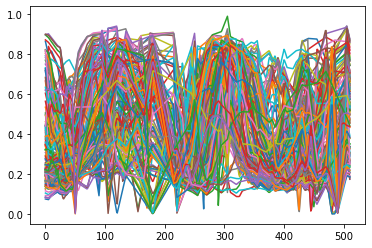

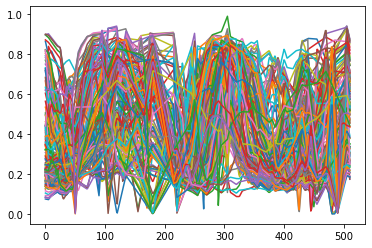

In [54]:
fd.plot()

In [55]:
TabelaGirassol.head()

,ID,DATA,NDVI_MED,Lat,Lon
0,1746371,2020-09-01,0.2415,39.414462,-8.518417
1,1746371,2020-09-06,0.2327,39.414462,-8.518417
2,1746371,2020-09-11,0.1315,39.414462,-8.518417
3,1746371,2020-09-16,0.1295,39.414462,-8.518417
4,1746371,2020-09-21,0.1279,39.414462,-8.518417


In [56]:
#Ver apenas os ID únicos
TabelaGirassolUnique=TabelaGirassol.drop_duplicates(subset=['ID'])

In [57]:
TabelaGirassolUnique.drop(['DATA', 'NDVI_MED'], axis=1, inplace=True)

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_10408\1263682444.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
TabelaGirassolUnique

,ID,Lat,Lon
0,1746371,39.414462,-8.518417
303,5736930,39.297541,-8.721530
400,5738625,39.401833,-8.505527
497,5741229,39.290439,-8.709151
594,5741317,39.289399,-8.711883
...,...,...,...
15862,42940857,39.464774,-8.245829
15958,42940858,39.463549,-8.245071
16054,43166034,39.368490,-8.525089
16150,43511362,39.442480,-8.519982


In [59]:
TabelaGirassolUnique2=TabelaGirassolUnique
TabelaGirassolUnique2['Size']=10

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_10408\1397427056.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
TabelaGirassolUnique2

,ID,Lat,Lon,Size
0,1746371,39.414462,-8.518417,10
303,5736930,39.297541,-8.721530,10
400,5738625,39.401833,-8.505527,10
497,5741229,39.290439,-8.709151,10
594,5741317,39.289399,-8.711883,10
...,...,...,...,...
15862,42940857,39.464774,-8.245829,10
15958,42940858,39.463549,-8.245071,10
16054,43166034,39.368490,-8.525089,10
16150,43511362,39.442480,-8.519982,10


In [61]:
import plotly.express as px
fig = px.scatter_geo(TabelaGirassolUnique2, lat="Lat", lon="Lon", color="ID",
                     hover_name="ID", size="Size",
                     projection="natural earth")
fig.show()

In [62]:
df_trans

DATA,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,...,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24
ID,,,,,,,,,,,,,,,,,,,,,
1746371,0.2415,0.23974,0.23798,0.23622,0.23446,0.2327,0.21246,0.19222,0.17198,0.15174,...,0.44780,0.42790,0.40800,0.38810,0.3682,0.36042,0.35264,0.34486,0.33708,0.3293
5736930,0.1778,0.17746,0.17712,0.17678,0.17644,0.1761,0.17682,0.17754,0.17826,0.17898,...,0.54644,0.55608,0.56572,0.57536,0.5850,0.57920,0.57340,0.56760,0.56180,0.5560
5738625,0.7687,0.76090,0.75310,0.74530,0.73750,0.7297,0.71840,0.70710,0.69580,0.68450,...,0.25544,0.26068,0.26592,0.27116,0.2764,0.26990,0.26340,0.25690,0.25040,0.2439
5741229,0.1398,0.13988,0.13996,0.14004,0.14012,0.1402,0.14052,0.14084,0.14116,0.14148,...,0.52046,0.52942,0.53838,0.54734,0.5563,0.54464,0.53298,0.52132,0.50966,0.4980
5741317,0.2259,0.22500,0.22410,0.22320,0.22230,0.2214,0.22078,0.22016,0.21954,0.21892,...,0.49470,0.50370,0.51270,0.52170,0.5307,0.52088,0.51106,0.50124,0.49142,0.4816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44613146,0.2464,0.24538,0.24436,0.24334,0.24232,0.2413,0.24332,0.24534,0.24736,0.24938,...,0.38986,0.39612,0.40238,0.40864,0.4149,0.40888,0.40286,0.39684,0.39082,0.3848
44613735,0.3876,0.38860,0.38960,0.39060,0.39160,0.3926,0.38454,0.37648,0.36842,0.36036,...,0.37236,0.40422,0.43608,0.46794,0.4998,0.49494,0.49008,0.48522,0.48036,0.4755
44645418,0.2213,0.22018,0.21906,0.21794,0.21682,0.2157,0.22708,0.23846,0.24984,0.26122,...,0.50842,0.50194,0.49546,0.48898,0.4825,0.47416,0.46582,0.45748,0.44914,0.4408


In [63]:
df_trans[:10]

DATA,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,...,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24
ID,,,,,,,,,,,,,,,,,,,,,
1746371,0.2415,0.23974,0.23798,0.23622,0.23446,0.2327,0.21246,0.19222,0.17198,0.15174,...,0.44780,0.42790,0.40800,0.38810,0.3682,0.36042,0.35264,0.34486,0.33708,0.3293
5736930,0.1778,0.17746,0.17712,0.17678,0.17644,0.1761,0.17682,0.17754,0.17826,0.17898,...,0.54644,0.55608,0.56572,0.57536,0.5850,0.57920,0.57340,0.56760,0.56180,0.5560
5738625,0.7687,0.76090,0.75310,0.74530,0.73750,0.7297,0.71840,0.70710,0.69580,0.68450,...,0.25544,0.26068,0.26592,0.27116,0.2764,0.26990,0.26340,0.25690,0.25040,0.2439
5741229,0.1398,0.13988,0.13996,0.14004,0.14012,0.1402,0.14052,0.14084,0.14116,0.14148,...,0.52046,0.52942,0.53838,0.54734,0.5563,0.54464,0.53298,0.52132,0.50966,0.4980
5741317,0.2259,0.22500,0.22410,0.22320,0.22230,0.2214,0.22078,0.22016,0.21954,0.21892,...,0.49470,0.50370,0.51270,0.52170,0.5307,0.52088,0.51106,0.50124,0.49142,0.4816
5794428,0.2853,0.28530,0.28530,0.28530,0.28530,0.2853,0.27384,0.26238,0.25092,0.23946,...,0.59334,0.60298,0.61262,0.62226,0.6319,0.61988,0.60786,0.59584,0.58382,0.5718
5799708,0.1154,0.11406,0.11272,0.11138,0.11004,0.1087,0.10960,0.11050,0.11140,0.11230,...,0.36676,0.37352,0.38028,0.38704,0.3938,0.39166,0.38952,0.38738,0.38524,0.3831
5935647,0.2230,0.22300,0.22300,0.22300,0.22300,0.2230,0.22230,0.22160,0.22090,0.22020,...,0.57320,0.57500,0.57680,0.57860,0.5804,0.57154,0.56268,0.55382,0.54496,0.5361
5935649,0.2741,0.27410,0.27410,0.27410,0.27410,0.2741,0.27420,0.27430,0.27440,0.27450,...,0.57300,0.62140,0.66980,0.71820,0.7666,0.75322,0.73984,0.72646,0.71308,0.6997


In [64]:
dfx=df_trans
dfx_trans=dfx.T

In [65]:
dfx_trans

ID,1746371,5736930,5738625,5741229,5741317,5794428,5799708,5935647,5935649,5939004,...,44380995,44388893,44439468,44465733,44613145,44613146,44613735,44645418,44764749,44765532
DATA,,,,,,,,,,,,,,,,,,,,,
2020-09-01,0.24150,0.17780,0.7687,0.13980,0.22590,0.28530,0.11540,0.22300,0.27410,0.10450,...,0.68260,0.44010,0.16570,0.24840,0.6332,0.24640,0.38760,0.22130,0.56330,0.61820
2020-09-02,0.23974,0.17746,0.7609,0.13988,0.22500,0.28530,0.11406,0.22300,0.27410,0.10280,...,0.65392,0.47458,0.16648,0.25084,0.6171,0.24538,0.38860,0.22018,0.54758,0.61998
2020-09-03,0.23798,0.17712,0.7531,0.13996,0.22410,0.28530,0.11272,0.22300,0.27410,0.10110,...,0.62524,0.50906,0.16726,0.25328,0.6010,0.24436,0.38960,0.21906,0.53186,0.62176
2020-09-04,0.23622,0.17678,0.7453,0.14004,0.22320,0.28530,0.11138,0.22300,0.27410,0.09940,...,0.59656,0.54354,0.16804,0.25572,0.5849,0.24334,0.39060,0.21794,0.51614,0.62354
2020-09-05,0.23446,0.17644,0.7375,0.14012,0.22230,0.28530,0.11004,0.22300,0.27410,0.09770,...,0.56788,0.57802,0.16882,0.25816,0.5688,0.24232,0.39160,0.21682,0.50042,0.62532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,0.36042,0.57920,0.2699,0.54464,0.52088,0.61988,0.39166,0.57154,0.75322,0.44608,...,0.32930,0.60970,0.78800,0.58340,0.2448,0.40888,0.49494,0.47416,0.44136,0.50390
2022-01-21,0.35264,0.57340,0.2634,0.53298,0.51106,0.60786,0.38952,0.56268,0.73984,0.45086,...,0.32300,0.52040,0.77660,0.57470,0.2424,0.40286,0.49008,0.46582,0.44032,0.50270
2022-01-22,0.34486,0.56760,0.2569,0.52132,0.50124,0.59584,0.38738,0.55382,0.72646,0.45564,...,0.31670,0.43110,0.76520,0.56600,0.2400,0.39684,0.48522,0.45748,0.43928,0.50150


In [66]:
dfx.values[0:20]

array([[0.2415 , 0.23974, 0.23798, ..., 0.34486, 0.33708, 0.3293 ],
       [0.1778 , 0.17746, 0.17712, ..., 0.5676 , 0.5618 , 0.556  ],
       [0.7687 , 0.7609 , 0.7531 , ..., 0.2569 , 0.2504 , 0.2439 ],
       ...,
       [0.5679 , 0.5679 , 0.5679 , ..., 0.28262, 0.27446, 0.2663 ],
       [0.2167 , 0.21568, 0.21466, ..., 0.3482 , 0.34   , 0.3318 ],
       [0.4964 , 0.49084, 0.48528, ..., 0.18696, 0.18568, 0.1844 ]])

In [67]:
dfx.index

Int64Index([ 1746371,  5736930,  5738625,  5741229,  5741317,  5794428,
             5799708,  5935647,  5935649,  5939004,
            ...
            44380995, 44388893, 44439468, 44465733, 44613145, 44613146,
            44613735, 44645418, 44764749, 44765532],
           dtype='int64', name='ID', length=155)

In [68]:
#lista de listas das séries
lista_teste=[]

for x in dfx.values:
    lista_teste.append(x)

In [69]:
type(lista_teste[0][0])

numpy.float64

In [70]:
lista_teste[0].shape

(511,)

In [71]:
w = 5
p = 2

In [72]:
import scipy.signal as ss
from scipy.signal import savgol_filter, general_gaussian

In [73]:
#Aplicação do filtro Sav-Gol
lista_teste2=[]
for x in lista_teste:
    lista_teste2.append(savgol_filter(x, 5*w+2, polyorder = 3*p, deriv=0))

In [74]:
df_testw = pd.DataFrame(data=lista_teste2, index=dfx.index)

In [75]:
df_testw2=df_testw.T

In [76]:
df_testw2

ID,1746371,5736930,5738625,5741229,5741317,5794428,5799708,5935647,5935649,5939004,...,44380995,44388893,44439468,44465733,44613145,44613146,44613735,44645418,44764749,44765532
0,0.235779,0.178129,0.768507,0.139721,0.225745,0.282383,0.115743,0.223534,0.274216,0.105512,...,0.678839,0.434532,0.165145,0.247288,0.641876,0.246096,0.383328,0.226996,0.573293,0.620082
1,0.244027,0.177202,0.760939,0.139951,0.225145,0.287318,0.113829,0.222533,0.273990,0.102039,...,0.657244,0.478427,0.167066,0.251576,0.610441,0.245817,0.392039,0.215611,0.539661,0.618070
2,0.245640,0.176696,0.753547,0.140039,0.224251,0.289394,0.112201,0.222505,0.273970,0.099735,...,0.629401,0.517320,0.167845,0.254908,0.589389,0.244443,0.394911,0.211882,0.518932,0.619973
3,0.241391,0.176513,0.745788,0.140071,0.223250,0.288321,0.110980,0.222817,0.274048,0.098480,...,0.598494,0.549753,0.168183,0.256978,0.577252,0.243045,0.393772,0.213593,0.508074,0.623165
4,0.232348,0.176573,0.737358,0.140111,0.222264,0.284296,0.110214,0.223078,0.274154,0.098128,...,0.566903,0.575167,0.168456,0.257734,0.572439,0.242234,0.390078,0.218884,0.504423,0.625816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.361078,0.578033,0.269104,0.543078,0.519450,0.618194,0.390983,0.570676,0.737528,0.442377,...,0.325576,0.602551,0.780162,0.582661,0.245634,0.408806,0.487946,0.474014,0.431143,0.492852
507,0.350933,0.575943,0.265247,0.536388,0.514183,0.611519,0.390998,0.564511,0.759097,0.456267,...,0.328785,0.536033,0.789238,0.576269,0.241746,0.403878,0.499028,0.466142,0.448631,0.512172
508,0.343063,0.570874,0.259135,0.525712,0.505271,0.600623,0.389287,0.556267,0.766606,0.465123,...,0.326371,0.451310,0.785719,0.568092,0.237334,0.396832,0.502382,0.457902,0.463937,0.528407
509,0.336653,0.563229,0.251249,0.511582,0.493190,0.585975,0.386078,0.546109,0.743808,0.466706,...,0.316515,0.350703,0.766375,0.558279,0.234802,0.389637,0.492618,0.449331,0.460849,0.524538


In [77]:
df_testw3=df_testw2.T

In [78]:
windows=np.lib.stride_tricks.sliding_window_view(df_testw3, 131, axis=1)

In [79]:
len(windows[0][0])

131

# Criação da Curva Teórica de Kc

In [80]:
TabelaNDVI["Crop"].unique()

array(['Broculos', 'Couve_repolho', 'Cenoura', 'Couveflor', 'Salsao_aipo',
       'Cruciferas_abril (repolho, couve-flor, brócolis e couve de Bruxelas)',
       'Cruciferas_fevereiro (repolho, couve-flor, brócolis e couve de Bruxelas)',
       'Cruciferas_outubro_novembro (repolho, couve-flor, brócolis e couve de Bruxelas)',
       'Alface_abril', 'Alface_novembro_janeiro',
       'Alface_outobro_novembro', 'Alface_fevereiro', 'Cebola (seca)',
       'Cebola (verde)', 'Cebola (semente)', 'Espinafre', 'Rabanete',
       'Berinjela', 'Pimentaodoce', 'Tomate', 'Cantalupo_meloa_janeiro',
       'Cantalupo_meloa_agosto', 'Pepino_junho_agosto',
       'Pepino_novembro__fevereiro', 'Abobora',
       'Corgette_abobrinha_abril__dezembro',
       'Corgette_abobrinha_maio_junho', 'Melao', 'Melancia',
       'Beterraba_abril_maio', 'Beterraba_fevereiro_marco',
       'Batata_janeiro__novembro', 'Batata_maio', 'Batata_abril',
       'Batatadoce', 'Beterraba_maio', 'Beterraba_novembro',
       'Grao

In [81]:
TabelaNDVIGirassol=TabelaNDVI[(TabelaNDVI['Crop']=="Girassol")]

In [82]:
abc=float(TabelaNDVIGirassol["Kc ini"].values)

In [83]:
TabelaTempoGirassol=TabelaTempo[(TabelaTempo['Crop']=="Girassol")]

In [84]:
defg=int(TabelaTempoGirassol["Init. (Lini)"].values)

In [85]:
listaInit=[abc]*defg

In [86]:
listaInit

[0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35]

In [87]:
defg=int(TabelaTempoGirassol["Dev. (Ldev)"].values)

In [88]:
an_array = np.empty((defg))
an_array[:] = np.NaN

In [89]:
an_array

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [90]:
abc=float(TabelaNDVIGirassol["Kc mid"].values)
defg=int(TabelaTempoGirassol["Mid (Lmid)"].values)

In [91]:
listaMid=[abc]*defg

In [92]:
defg=int(TabelaTempoGirassol["Late (Llate)"].values)

In [93]:
an_array2 = np.empty((defg))
an_array2[:] = np.NaN

In [94]:
abc=float(TabelaNDVIGirassol["Kc end"].values)

In [95]:
for x in an_array:
    listaInit.append(x)

In [96]:
for x in listaMid:
    listaInit.append(x)

In [97]:
for x in an_array2:
    listaInit.append(x)

In [98]:
listaInit.append(abc)

In [99]:
listateoric=listaInit

In [100]:
listateoric

[0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 0.35,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.35]

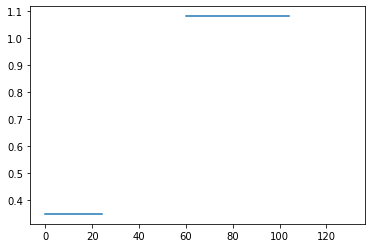

In [101]:
plt.plot(listateoric)

In [102]:
dfteoric = pd.DataFrame (listateoric, columns = ['Kcteoric'])

<AxesSubplot:>

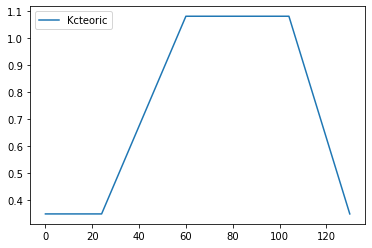

In [103]:
dfteoric.interpolate(method="linear").plot()

In [104]:
dfteoric=dfteoric.interpolate(method="linear")

<AxesSubplot:xlabel='Days', ylabel='Kc'>

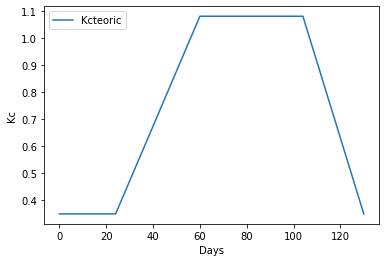

In [105]:
dfteoric.plot(xlabel="Days",ylabel="Kc")

# Criação do período melhor representativo utilizando a correlação de Pearson

In [106]:
import scipy.stats as stats

In [107]:
windows=np.lib.stride_tricks.sliding_window_view(df_testw3, 131, axis=1)

In [108]:
len(windows[0][0])

131

In [109]:
z=np.arange(131)
i=0
zasx=[]
xsaz=[]
s=0

for z in windows:
    for xi in windows[i]:
        #overall_pearson_r = xi.corr(NDVIblue5["KcTeoric"])
        r, p = stats.pearsonr(xi,dfteoric['Kcteoric'])
        #if r>s:
        #zasx.append(r)
        #xsaz.append(NDVIblue6.index(xi))
        #s=r
        xsaz.append(r)
        #print(r)
        #print(p)
        #print(f"Pandas computed Pearson r: {overall_pearson_r}")
    aws=np.array(xsaz)
    zasx.append(aws.argmax())   
    i=i+1
    xsaz=[]
mat = np.array(zasx)

In [110]:
#mat

In [111]:
adada=[]
i=0
for x in mat:
    adada.append(windows[i][x])
    i=i+1

In [112]:
#adada

In [113]:
df_testmelhor= pd.DataFrame(data=adada, index=dfx.index)

In [114]:
df_testmelhor2=df_testmelhor.T

In [115]:
#df_testmelhor2.plot()

In [116]:
df_testmelhor2

ID,1746371,5736930,5738625,5741229,5741317,5794428,5799708,5935647,5935649,5939004,...,44380995,44388893,44439468,44465733,44613145,44613146,44613735,44645418,44764749,44765532
0,0.145572,0.281074,0.146400,0.181986,0.206119,0.201826,0.198219,0.223534,0.274320,0.115124,...,0.146731,0.253634,0.196458,0.256149,0.190331,0.169072,0.173263,0.462507,0.319761,0.317773
1,0.151629,0.287112,0.147080,0.186367,0.206159,0.195233,0.196796,0.222533,0.274364,0.115732,...,0.148135,0.249109,0.198338,0.256352,0.192131,0.172853,0.179602,0.464404,0.320800,0.315488
2,0.157160,0.293011,0.148692,0.190428,0.206141,0.188327,0.195313,0.222505,0.274394,0.116870,...,0.150434,0.245532,0.200155,0.257195,0.194066,0.176721,0.185505,0.466220,0.322070,0.313507
3,0.161022,0.298420,0.150556,0.194371,0.205820,0.181261,0.193892,0.222817,0.274426,0.119782,...,0.153598,0.242194,0.202698,0.259010,0.195837,0.180527,0.191124,0.467070,0.321506,0.312919
4,0.162445,0.302933,0.152111,0.198273,0.204619,0.173266,0.192664,0.223078,0.274477,0.124264,...,0.157376,0.238493,0.206177,0.262115,0.197257,0.184189,0.196890,0.466350,0.317262,0.312526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.406428,0.637915,0.361227,0.395289,0.229567,0.332056,0.237107,0.681970,0.743207,0.283178,...,0.460451,0.142419,0.383917,0.636941,0.276163,0.317319,0.711344,0.508787,0.229063,0.195519
127,0.389026,0.636143,0.347747,0.390110,0.226529,0.332807,0.232078,0.691851,0.753942,0.272600,...,0.444010,0.142549,0.384584,0.632799,0.271477,0.330115,0.710185,0.502263,0.228943,0.188879
128,0.373800,0.634035,0.336002,0.385040,0.223943,0.331899,0.227092,0.701321,0.762198,0.261600,...,0.425484,0.142887,0.385131,0.633616,0.266803,0.339466,0.710290,0.495588,0.229678,0.183960
129,0.361078,0.631318,0.325678,0.380069,0.221886,0.329737,0.222368,0.710320,0.768139,0.250600,...,0.404633,0.142870,0.385430,0.639456,0.262157,0.343606,0.710632,0.488695,0.230273,0.180975


In [117]:
df_testmelhor3=df_testmelhor2.T

# Conjunto de teste

In [118]:
dfcjteste=df_testmelhor3[:67]

In [119]:
dfcjteste2=dfcjteste.T

In [120]:
dfcjteste2

ID,1746371,5736930,5738625,5741229,5741317,5794428,5799708,5935647,5935649,5939004,...,34539698,35349214,35439526,35446778,35446843,35448303,35448705,35465001,35465011,35474994
0,0.145572,0.281074,0.146400,0.181986,0.206119,0.201826,0.198219,0.223534,0.274320,0.115124,...,0.274587,0.234474,0.157524,0.244734,0.162738,0.202317,0.396070,0.227788,0.141249,0.214073
1,0.151629,0.287112,0.147080,0.186367,0.206159,0.195233,0.196796,0.222533,0.274364,0.115732,...,0.272628,0.230899,0.159273,0.234919,0.163329,0.206372,0.405027,0.217292,0.139871,0.212712
2,0.157160,0.293011,0.148692,0.190428,0.206141,0.188327,0.195313,0.222505,0.274394,0.116870,...,0.270456,0.230588,0.160479,0.228084,0.164367,0.209647,0.414014,0.201940,0.138510,0.211961
3,0.161022,0.298420,0.150556,0.194371,0.205820,0.181261,0.193892,0.222817,0.274426,0.119782,...,0.268184,0.231754,0.161565,0.223957,0.166054,0.212120,0.422861,0.181856,0.137428,0.211658
4,0.162445,0.302933,0.152111,0.198273,0.204619,0.173266,0.192664,0.223078,0.274477,0.124264,...,0.265993,0.233273,0.162798,0.221986,0.168384,0.214113,0.431316,0.159852,0.136100,0.211812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.406428,0.637915,0.361227,0.395289,0.229567,0.332056,0.237107,0.681970,0.743207,0.283178,...,0.398671,0.781632,0.302376,0.172144,0.297121,0.400024,0.536997,0.206418,0.149577,0.288277
127,0.389026,0.636143,0.347747,0.390110,0.226529,0.332807,0.232078,0.691851,0.753942,0.272600,...,0.389819,0.793183,0.292723,0.168494,0.295541,0.393322,0.551917,0.204648,0.150177,0.285029
128,0.373800,0.634035,0.336002,0.385040,0.223943,0.331899,0.227092,0.701321,0.762198,0.261600,...,0.381236,0.804532,0.285174,0.165607,0.297024,0.386724,0.579325,0.201476,0.151481,0.281635
129,0.361078,0.631318,0.325678,0.380069,0.221886,0.329737,0.222368,0.710320,0.768139,0.250600,...,0.372699,0.815625,0.280128,0.163112,0.301192,0.380231,0.614885,0.197543,0.153105,0.278212


Text(0, 0.5, 'NDVI')

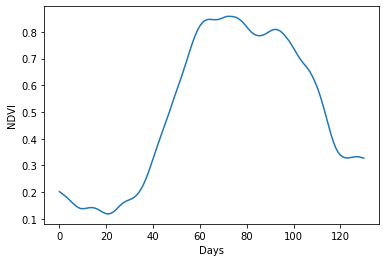

In [121]:
dfcjteste2[5794428].plot()
#dfcjteste2[5738625].plot()
#dfcjteste2[5939004].plot()
#dfcjteste2[34539698].plot()
#dfcjteste2[35446843].plot()
plt.xlabel("Days")
plt.ylabel("NDVI")

<AxesSubplot:>

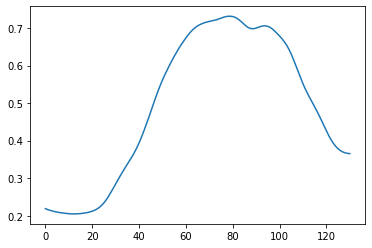

In [122]:
dfcjteste.mean().plot()

In [123]:
serietestemean=dfcjteste.mean()

In [124]:
arraytestemean=dfcjteste.mean().values

In [125]:
dfcjteste.mean().values

array([0.21873306, 0.21622585, 0.21412103, 0.21233042, 0.21078401,
       0.20947106, 0.2083879 , 0.20743425, 0.20657513, 0.20580738,
       0.20523238, 0.2048227 , 0.20467216, 0.20478491, 0.20505996,
       0.20555749, 0.20625093, 0.20719915, 0.20842034, 0.2100346 ,
       0.21197611, 0.21442863, 0.21767601, 0.22193542, 0.22737442,
       0.23418434, 0.24240363, 0.25186563, 0.26231886, 0.2732686 ,
       0.28451144, 0.29569627, 0.30664401, 0.31717814, 0.3273559 ,
       0.33719547, 0.34705335, 0.35722687, 0.3682799 , 0.38047062,
       0.39393459, 0.40876823, 0.42475809, 0.4416404 , 0.45916099,
       0.47719014, 0.49537141, 0.51320519, 0.53033986, 0.54648383,
       0.56147525, 0.57534617, 0.5883882 , 0.60089109, 0.61300836,
       0.62449605, 0.63545185, 0.6458107 , 0.65565278, 0.66489124,
       0.67367161, 0.68192058, 0.68942743, 0.69584462, 0.7012806 ,
       0.70569479, 0.70912922, 0.7118579 , 0.71415465, 0.71599801,
       0.71744964, 0.71870453, 0.72012439, 0.72182504, 0.72390

In [126]:
seed=0

In [127]:
from tslearn.clustering import TimeSeriesKMeans

modelteste2 = TimeSeriesKMeans(n_clusters=2, metric="euclidean",
                         max_iter=1000,n_init=10, random_state=seed)
modelteste2.fit(dfcjteste)

TimeSeriesKMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=0)

In [128]:
#import tslearn.clustering
#from tslearn.metrics import cdist_dtw
#
#K = range(2,11)
#for k in K:
#    model1 = TimeSeriesKMeans(n_clusters=k, metric="euclidean",max_iter=1000,n_init=10, random_state=seed)
#    model1.fit(df_testmelhor3)
#    print(k)
#    print(tslearn.clustering.silhouette_score(df_testmelhor3, labels=model1.labels_, metric="euclidean"))

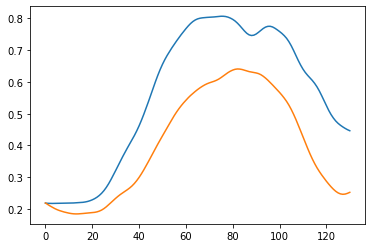

In [129]:
for x in modelteste2.cluster_centers_:
    plt.plot(x)

In [130]:
import tslearn.clustering
from tslearn.metrics import cdist_dtw
tslearn.clustering.silhouette_score(dfcjteste, labels=modelteste2.labels_, metric="euclidean")

0.3486700451162377

In [131]:
modelteste2.inertia_

1.217214190550683

In [132]:
modelteste2.cluster_centers_

array([[[0.21869316],
        [0.21779491],
        [0.21746472],
        [0.21747126],
        [0.21762158],
        [0.21781726],
        [0.21799747],
        [0.218099  ],
        [0.21814004],
        [0.2181874 ],
        [0.21833804],
        [0.2185922 ],
        [0.21894874],
        [0.21938081],
        [0.21977259],
        [0.22028227],
        [0.22098168],
        [0.22208044],
        [0.22366987],
        [0.22591998],
        [0.22881675],
        [0.23240685],
        [0.23692881],
        [0.2425512 ],
        [0.24946506],
        [0.25786532],
        [0.26792891],
        [0.27956097],
        [0.29261957],
        [0.30652597],
        [0.32106245],
        [0.33578122],
        [0.3504626 ],
        [0.36479329],
        [0.3787456 ],
        [0.39208059],
        [0.40503516],
        [0.41791642],
        [0.43139235],
        [0.44592163],
        [0.4617792 ],
        [0.47914911],
        [0.49783847],
        [0.5175611 ],
        [0.53799392],
        [0

In [133]:
cluster_centersteste=[]
for x in modelteste2.cluster_centers_:
    abc=np.concatenate(x, axis=0)
    cluster_centersteste.append(abc)

In [134]:
x=np.arange(0,131)

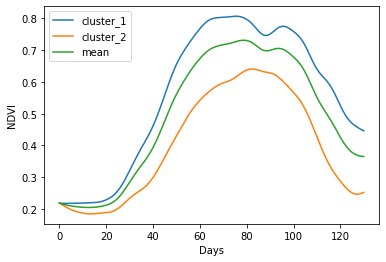

In [135]:
plt.plot(x, cluster_centersteste[0], "tab:blue", label="cluster_1")
plt.plot(x, cluster_centersteste[1], "tab:orange", label="cluster_2")
plt.plot(x, arraytestemean, "tab:green", label="mean")
plt.legend(loc="upper left")
plt.xlabel("Days")
plt.ylabel("NDVI")
plt.show()

# Mean

<AxesSubplot:>

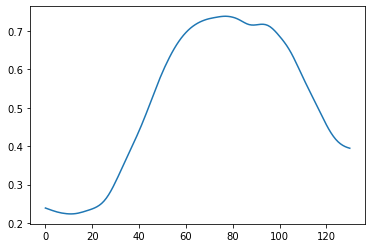

In [136]:
df_testmelhor3.mean().plot()

In [137]:
seriemean=df_testmelhor3.mean()

In [138]:
arraymean=df_testmelhor3.mean().values

In [139]:
df_testmelhor3.mean().values

array([0.23873241, 0.2365103 , 0.23434163, 0.23220861, 0.23019311,
       0.22840227, 0.22688821, 0.22563428, 0.22465649, 0.22392875,
       0.22347879, 0.22334668, 0.22361606, 0.2242884 , 0.22536414,
       0.2268102 , 0.22848625, 0.230325  , 0.23223995, 0.2342783 ,
       0.23645464, 0.23895248, 0.2420104 , 0.2458247 , 0.25065225,
       0.25677227, 0.26431752, 0.27330383, 0.28370733, 0.29514698,
       0.30743028, 0.3202849 , 0.33344358, 0.34668514, 0.35993503,
       0.37308952, 0.38618572, 0.39928727, 0.41256301, 0.42602557,
       0.43986741, 0.45418603, 0.46903377, 0.48440612, 0.50016183,
       0.51614126, 0.5322307 , 0.54814698, 0.56369217, 0.57867306,
       0.59302237, 0.60665329, 0.61954501, 0.63177005, 0.64337134,
       0.65418392, 0.66421812, 0.67343776, 0.68186995, 0.68950267,
       0.69636273, 0.70252472, 0.70802982, 0.71281397, 0.71701003,
       0.72068136, 0.72387121, 0.72657106, 0.72892623, 0.73092788,
       0.73256434, 0.73388631, 0.73509369, 0.73620217, 0.73722

# Clustering

In [140]:
seed=0

In [141]:
from tslearn.clustering import TimeSeriesKMeans

model2 = TimeSeriesKMeans(n_clusters=2, metric="euclidean",
                         max_iter=1000,n_init=10, random_state=seed)
model2.fit(df_testmelhor3)

TimeSeriesKMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=0)

In [142]:
#import tslearn.clustering
#from tslearn.metrics import cdist_dtw
#
#K = range(2,11)
#for k in K:
#    model1 = TimeSeriesKMeans(n_clusters=k, metric="euclidean",max_iter=1000,n_init=10, random_state=seed)
#    model1.fit(df_testmelhor3)
#    print(k)
#    print(tslearn.clustering.silhouette_score(df_testmelhor3, labels=model1.labels_, metric="euclidean"))

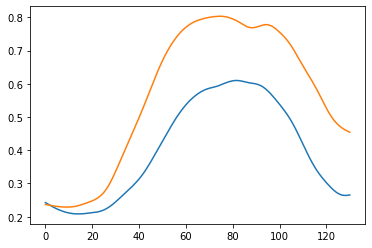

In [143]:
for x in model2.cluster_centers_:
    plt.plot(x)

In [144]:
import tslearn.clustering
from tslearn.metrics import cdist_dtw
tslearn.clustering.silhouette_score(df_testmelhor3, labels=model2.labels_, metric="euclidean")

0.3722055433374198

In [145]:
model2.inertia_

1.3259534377807676

In [146]:
model2.cluster_centers_

array([[[0.2425288 ],
        [0.23832926],
        [0.23420546],
        [0.23028382],
        [0.22657138],
        [0.22314939],
        [0.22006697],
        [0.21737134],
        [0.21498101],
        [0.21293157],
        [0.21129904],
        [0.21001142],
        [0.20911806],
        [0.20857076],
        [0.20841739],
        [0.20854353],
        [0.20893994],
        [0.20957882],
        [0.21040161],
        [0.21123633],
        [0.21200917],
        [0.2128827 ],
        [0.21400501],
        [0.21554714],
        [0.21766882],
        [0.22050546],
        [0.2240655 ],
        [0.22833919],
        [0.23323629],
        [0.23865972],
        [0.24463056],
        [0.25101459],
        [0.25761724],
        [0.26428847],
        [0.27085199],
        [0.2773485 ],
        [0.28391554],
        [0.2906652 ],
        [0.29782714],
        [0.3054163 ],
        [0.31355361],
        [0.32239781],
        [0.33201047],
        [0.34240808],
        [0.35358071],
        [0

In [147]:
cluster_centers=[]
for x in model2.cluster_centers_:
    abc=np.concatenate(x, axis=0)
    cluster_centers.append(abc)

In [148]:
cluster_centers[0]

array([0.2425288 , 0.23832926, 0.23420546, 0.23028382, 0.22657138,
       0.22314939, 0.22006697, 0.21737134, 0.21498101, 0.21293157,
       0.21129904, 0.21001142, 0.20911806, 0.20857076, 0.20841739,
       0.20854353, 0.20893994, 0.20957882, 0.21040161, 0.21123633,
       0.21200917, 0.2128827 , 0.21400501, 0.21554714, 0.21766882,
       0.22050546, 0.2240655 , 0.22833919, 0.23323629, 0.23865972,
       0.24463056, 0.25101459, 0.25761724, 0.26428847, 0.27085199,
       0.2773485 , 0.28391554, 0.2906652 , 0.29782714, 0.3054163 ,
       0.31355361, 0.32239781, 0.33201047, 0.34240808, 0.35358071,
       0.3653517 , 0.37758993, 0.39001095, 0.40242291, 0.41481465,
       0.42713906, 0.43934032, 0.45162798, 0.46402375, 0.47621369,
       0.48785607, 0.49889092, 0.50925227, 0.5189983 , 0.52817012,
       0.53668315, 0.54454985, 0.55172973, 0.55814622, 0.56404721,
       0.56935563, 0.57404459, 0.57809432, 0.58153669, 0.58434715,
       0.58658137, 0.588354  , 0.59010687, 0.59204672, 0.59431

In [149]:
cluster_centers2=cluster_centers

In [150]:
cluster_centers2[0]

array([0.2425288 , 0.23832926, 0.23420546, 0.23028382, 0.22657138,
       0.22314939, 0.22006697, 0.21737134, 0.21498101, 0.21293157,
       0.21129904, 0.21001142, 0.20911806, 0.20857076, 0.20841739,
       0.20854353, 0.20893994, 0.20957882, 0.21040161, 0.21123633,
       0.21200917, 0.2128827 , 0.21400501, 0.21554714, 0.21766882,
       0.22050546, 0.2240655 , 0.22833919, 0.23323629, 0.23865972,
       0.24463056, 0.25101459, 0.25761724, 0.26428847, 0.27085199,
       0.2773485 , 0.28391554, 0.2906652 , 0.29782714, 0.3054163 ,
       0.31355361, 0.32239781, 0.33201047, 0.34240808, 0.35358071,
       0.3653517 , 0.37758993, 0.39001095, 0.40242291, 0.41481465,
       0.42713906, 0.43934032, 0.45162798, 0.46402375, 0.47621369,
       0.48785607, 0.49889092, 0.50925227, 0.5189983 , 0.52817012,
       0.53668315, 0.54454985, 0.55172973, 0.55814622, 0.56404721,
       0.56935563, 0.57404459, 0.57809432, 0.58153669, 0.58434715,
       0.58658137, 0.588354  , 0.59010687, 0.59204672, 0.59431

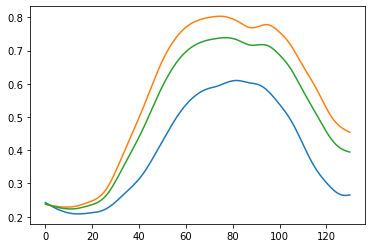

In [151]:
x=np.arange(0,131)
for zz in cluster_centers:
    plt.plot(x, zz)
#mean->green
plt.plot(x,df_testmelhor3.mean().values)
plt.show()

# Models

# Mean

## Linear

In [167]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

#X = NDVIbluesync.iloc[:,:-1].values
X=df_testmelhor3.mean().values.reshape(-1,1)
#y = NDVIbluesync.iloc[:,1].values
y=dfteoric['Kcteoric'].values
Reg = linear_model.LinearRegression()
Reg.fit(X, y)
pred = Reg.predict(X)
print(Reg.coef_)
print(Reg.intercept_)

[1.53837373]
-0.025105465164393048


In [168]:
Reg.score(X, y)

0.9729060244412296

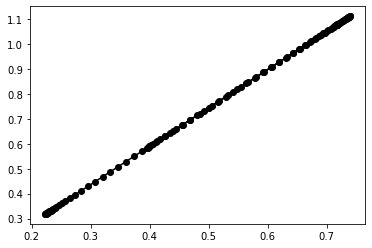

In [169]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
plt.plot(X, pred, color = 'Black', marker = 'o')

In [170]:
print(r2)
print(mse)

0.9729060244412296
0.002395974722390083


In [171]:
print(np.sqrt(mse))

0.04894869479761522


In [172]:
pred

array([0.3421542 , 0.33873576, 0.33539955, 0.33211816, 0.32901757,
       0.32626259, 0.32393339, 0.32200439, 0.32050018, 0.31938064,
       0.31868843, 0.3184852 , 0.31889961, 0.31993392, 0.32158882,
       0.32381339, 0.32639178, 0.32922047, 0.33216638, 0.33530212,
       0.33865014, 0.34249275, 0.34719697, 0.35306479, 0.36049137,
       0.36990625, 0.38151366, 0.39533798, 0.41134244, 0.4289409 ,
       0.4478372 , 0.46761241, 0.48785538, 0.50822585, 0.52860912,
       0.54884566, 0.56899251, 0.58914758, 0.60957063, 0.63028107,
       0.651575  , 0.67360239, 0.69644376, 0.72009219, 0.74433035,
       0.7689127 , 0.79366426, 0.81814944, 0.84206376, 0.86510997,
       0.88718457, 0.90815401, 0.9279863 , 0.94679299, 0.96464011,
       0.98127389, 0.99671024, 1.0108935 , 1.02386535, 1.03560733,
       1.04616066, 1.05564011, 1.06410901, 1.07146882, 1.07792392,
       1.0835718 , 1.08847899, 1.09263237, 1.09625551, 1.09933479,
       1.10185227, 1.10388595, 1.10574337, 1.10744862, 1.10902

In [173]:
y

array([0.35      , 0.35      , 0.35      , 0.35      , 0.35      ,
       0.35      , 0.35      , 0.35      , 0.35      , 0.35      ,
       0.35      , 0.35      , 0.35      , 0.35      , 0.35      ,
       0.35      , 0.35      , 0.35      , 0.35      , 0.35      ,
       0.35      , 0.35      , 0.35      , 0.35      , 0.35      ,
       0.37027778, 0.39055556, 0.41083333, 0.43111111, 0.45138889,
       0.47166667, 0.49194444, 0.51222222, 0.5325    , 0.55277778,
       0.57305556, 0.59333333, 0.61361111, 0.63388889, 0.65416667,
       0.67444444, 0.69472222, 0.715     , 0.73527778, 0.75555556,
       0.77583333, 0.79611111, 0.81638889, 0.83666667, 0.85694444,
       0.87722222, 0.8975    , 0.91777778, 0.93805556, 0.95833333,
       0.97861111, 0.99888889, 1.01916667, 1.03944444, 1.05972222,
       1.08      , 1.08      , 1.08      , 1.08      , 1.08      ,
       1.08      , 1.08      , 1.08      , 1.08      , 1.08      ,
       1.08      , 1.08      , 1.08      , 1.08      , 1.08   

In [174]:
frameplotazul = { 'Kc_Teoric': y, 'Kc_Predicted': pred, 'NDVI': X.reshape(131,)}

plotazul = pd.DataFrame(frameplotazul)

<AxesSubplot:>

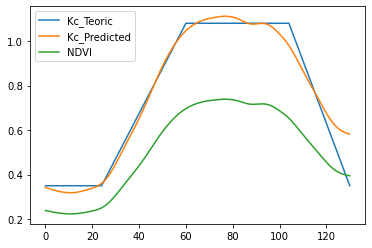

In [175]:
plotazul.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

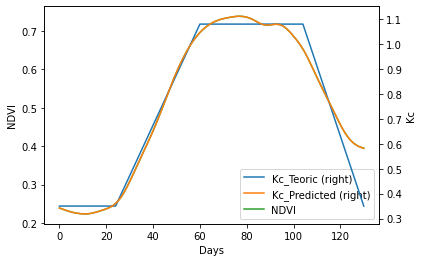

In [176]:
plt.figure()
ax = plotazul.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [177]:
#plt.scatter(y,pred)
#plt.plot(y,pred,color="red")
#plt.show()

In [178]:
#statsmodels

In [179]:
import statsmodels.api as sm
#performing the regression
Xa = sm.add_constant(X)
result = sm.OLS(y, Xa).fit()

# Result of statsmodels 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     4632.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          5.92e-103
Time:                        17:22:43   Log-Likelihood:                 209.34
No. Observations:                 131   AIC:                            -414.7
Df Residuals:                     129   BIC:                            -408.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0251      0.012     -2.021      0.0

In [180]:
result.resid.mean()

7.457986730306395e-16

__Explain the Statistics__

__Model : OLS : Ordinary Least Squares : One way to create a linear regression model. Minimize the dependent samples so you can estimate the unknown samples when creating a linear regression model.__

__Method : Least Squares : Fit data to the model by minimizing the residual samples__

__R-quared : Measure of how well the regression line approximates the data points. If .5 then that is a sign that half of the observed variation can be explained by the models inputs. 1 would be perfectly correlated.__

__Adj, R-squared : Reflects the fit of the model. Values range from 0 to 1, where higher values indicate a good fit.__

__F-statistic : Measures how significantly the data points fit into the regression model by measuring variation of sample means.__

__Prob (F-statistic) : Probability that the null hypothesis for the full model is true. Closer to zero the better the samples approach the model.__

__Log-Likelihood : The conditional probability that the observed data fits the model__

__AIC : Adjusts the log-likelihood based on the number of observations and complexity of the model. It focuses on the data points that best describe the data.__

__Df Residuals : Degrees of freedom of the residuals which is the difference between predicted values and the measured data.__

__BIC : We want a low BIC. It focuses on the shortest description of the data like AIC.__

__Df Model : Number of parameters in the model__

__Coefficient Constant : Is your Y intercept. If both dependent and independent coefficients are zero then the expected output would equal the constant coefficient.__

__Independent Coefficient : Represents the change of the independent variable per unit.__

__Standard Error : Accuracy of the coefficients__

__P>|t| : The P Value. A P Value less than .05 is considered statistically significant.__

__[.025 - .975] : Confidence Interval : Represents the range in which coefficients are likely to fall.__

__Omnibus : (D’Angostino’s test) : Establishes whether the samples come from a normally distributed population.__

__Durbin-Watson : Test to see if the errors are not independent. Used to find repeating patterns that may be obstructed by noise. Its value lies between 0 and 4. If greater than 2 this is a sign that relationships between two variables are going in opposite directions (negatively correlated). If less than 2 variables are positively correlated.__

__Prob(Omnibus) : Probability of Omnibus__

__Jarque-Bera : Tests whether the samples match a normal distribution. It never has a negative number and the further it gets from zero signals the data doesn't have a normal distribution.__

__Skew : Measure of the asymmetry of the probability distribution. Negative skew indicates the tail is longer on the left and the concentration of the data is on the right. Positive indicates the tail is longer on the right. 0 indicates that the tails are balanced.__

__Prob(JB) : The probability of Jarque-Bera__

__Kurtosis : Describes the shape of a probability distribution with a focus on the tails and not the peak. If the value is high that is a sign that there are more outliers. If the value is less than 3 that means there are fewer outliers. A value of 3 points towards a normal distribution. Values greater than 3 indicate more outliers.__

__Condition Number : Represents whether samples are highly related in our regression model. A large number indicates strong multicollinearity which means that independent variables are highly correlated with each other. This causes problems because a small number of samples are so dramatically different from others that results are corrupted.__

# Linear-Mean Test (correcto)

In [181]:
pred2 = Reg.predict(np.array(arraytestemean).reshape(-1,1))
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [182]:
r2

0.9599185102855463

In [183]:
rmse

0.05953559192952813

In [184]:
arraytestemean

array([0.21873306, 0.21622585, 0.21412103, 0.21233042, 0.21078401,
       0.20947106, 0.2083879 , 0.20743425, 0.20657513, 0.20580738,
       0.20523238, 0.2048227 , 0.20467216, 0.20478491, 0.20505996,
       0.20555749, 0.20625093, 0.20719915, 0.20842034, 0.2100346 ,
       0.21197611, 0.21442863, 0.21767601, 0.22193542, 0.22737442,
       0.23418434, 0.24240363, 0.25186563, 0.26231886, 0.2732686 ,
       0.28451144, 0.29569627, 0.30664401, 0.31717814, 0.3273559 ,
       0.33719547, 0.34705335, 0.35722687, 0.3682799 , 0.38047062,
       0.39393459, 0.40876823, 0.42475809, 0.4416404 , 0.45916099,
       0.47719014, 0.49537141, 0.51320519, 0.53033986, 0.54648383,
       0.56147525, 0.57534617, 0.5883882 , 0.60089109, 0.61300836,
       0.62449605, 0.63545185, 0.6458107 , 0.65565278, 0.66489124,
       0.67367161, 0.68192058, 0.68942743, 0.69584462, 0.7012806 ,
       0.70569479, 0.70912922, 0.7118579 , 0.71415465, 0.71599801,
       0.71744964, 0.71870453, 0.72012439, 0.72182504, 0.72390

In [185]:
frameplotazulteste = { 'Kc_Teoric': y, 'Kc_Predicted': pred2, 'NDVI': arraytestemean}

plotazulteste = pd.DataFrame(frameplotazulteste)

<AxesSubplot:>

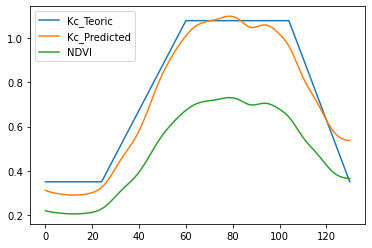

In [186]:
plotazulteste.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

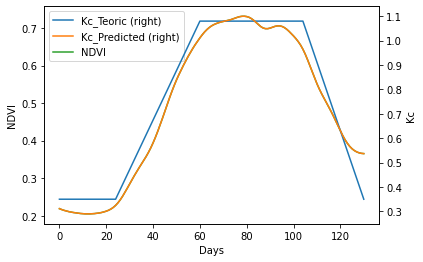

In [187]:
plt.figure()
ax = plotazulteste.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

# Linear-Mean Test

In [188]:
w = 15
p = 2

In [189]:
zxzxz=savgol_filter(df_testmelhor2[5738625], 5*w+2, polyorder = 3*p, deriv=0)

In [190]:
#zxzxz=savgol_filter(df_testmelhor2[1305223], 5*w+2, polyorder = 3*p, deriv=0)

In [191]:
pred2 = Reg.predict(np.array(zxzxz).reshape(-1,1))

In [192]:
#frameplotazul = { 'Kc_Teoric': y, 'Kc_Predicted': pred, 'NDVI': np.array(df_testmelhor2[147088]).reshape(131,),"original":X.reshape(131,),'Kc_Predicted2': pred2}
frameplotmean = { 'Kc_Teoric': y, 'Kc_Predicted': pred,'Kc_Predicted2': pred2,"original":X.reshape(131,), 'NDVI': np.array(zxzxz).reshape(131,)}
plotmean = pd.DataFrame(frameplotmean)

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

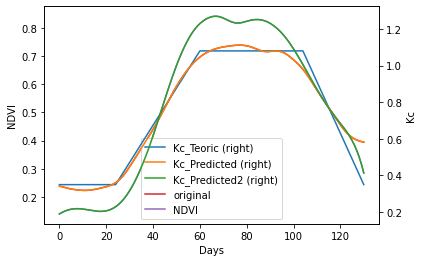

In [193]:
plt.figure()
ax = plotmean.plot(secondary_y=["Kc_Teoric","Kc_Predicted",'Kc_Predicted2'])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

<AxesSubplot:>

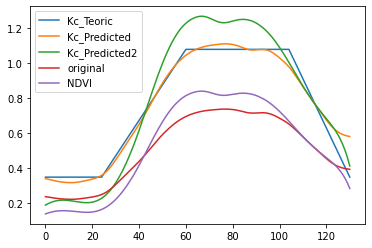

In [194]:
plotmean.plot()

In [195]:
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)

In [196]:
print(r2)
print(mse)

0.8182590733033562
0.016071715479493463


In [197]:
print(np.sqrt(mse))

0.12677426978489548


In [198]:
df_testmelhor3

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
ID,,,,,,,,,,,,,,,,,,,,,
1746371,0.145572,0.151629,0.157160,0.161022,0.162445,0.161163,0.157467,0.152197,0.146592,0.142035,...,0.508352,0.487596,0.466611,0.445763,0.425522,0.406428,0.389026,0.373800,0.361078,0.350933
5736930,0.281074,0.287112,0.293011,0.298420,0.302933,0.306066,0.307641,0.307579,0.305965,0.301992,...,0.648570,0.645995,0.643592,0.641469,0.639618,0.637915,0.636143,0.634035,0.631318,0.627758
5738625,0.146400,0.147080,0.148692,0.150556,0.152111,0.153026,0.153265,0.153090,0.152971,0.153361,...,0.445643,0.428864,0.412121,0.394676,0.376584,0.361227,0.347747,0.336002,0.325678,0.316575
5741229,0.181986,0.186367,0.190428,0.194371,0.198273,0.202196,0.206191,0.210227,0.214032,0.217787,...,0.420800,0.415704,0.410603,0.405497,0.400391,0.395289,0.390110,0.385040,0.380069,0.375107
5741317,0.206119,0.206159,0.206141,0.205820,0.204619,0.202806,0.200588,0.198209,0.195579,0.192703,...,0.245821,0.242732,0.239637,0.236345,0.232920,0.229567,0.226529,0.223943,0.221886,0.220466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44613146,0.169072,0.172853,0.176721,0.180527,0.184189,0.187697,0.191171,0.194783,0.198683,0.202869,...,0.330642,0.309404,0.298374,0.297543,0.305019,0.317319,0.330115,0.339466,0.343606,0.345342
44613735,0.173263,0.179602,0.185505,0.191124,0.196890,0.203248,0.210151,0.216276,0.222285,0.228309,...,0.735764,0.730103,0.724143,0.718622,0.714277,0.711344,0.710185,0.710290,0.710632,0.709979
44645418,0.462507,0.464404,0.466220,0.467070,0.466350,0.463831,0.459682,0.454428,0.448873,0.443974,...,0.541161,0.534527,0.528055,0.521632,0.515225,0.508787,0.502263,0.495588,0.488695,0.481521


In [199]:
df_testmelhor2.values

array([[0.14557247, 0.28107357, 0.14640011, ..., 0.46250656, 0.31976084,
        0.31777348],
       [0.15162854, 0.28711198, 0.14707955, ..., 0.46440365, 0.32080001,
        0.31548774],
       [0.15716042, 0.29301092, 0.1486922 , ..., 0.46621977, 0.32207038,
        0.31350709],
       ...,
       [0.3737998 , 0.63403501, 0.33600155, ..., 0.49558813, 0.22967812,
        0.18396042],
       [0.36107775, 0.63131763, 0.3256782 , ..., 0.48869497, 0.23027332,
        0.18097452],
       [0.35093305, 0.62775758, 0.31657548, ..., 0.48152098, 0.23058523,
        0.17939173]])

In [200]:
rmselist=[]
r2list=[]
for x in df_testmelhor3.values:
    zxzxz=savgol_filter(x, 5*w+2, polyorder = 3*p, deriv=0)
    pred2 = Reg.predict(np.array(zxzxz).reshape(-1,1))
    mse = mean_squared_error(y, pred2)
    r2 = r2_score(y, pred2)
    rmse=np.sqrt(mse)
    r2list.append(r2)
    rmselist.append(rmse)

In [201]:
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)
  
# Driver Code
averagermse = Average(rmselist)
averager2 = Average(r2list)

# Printing average of the list
print("Average of the rmse =", round(averagermse, 2))
print("Average of the r2 =", round(averager2, 2))

Average of the rmse = 0.19
Average of the r2 = 0.52


## Polinomial

In [202]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

In [203]:
coefficient = lin2.coef_
interceptors = lin2.intercept_

In [204]:
print(coefficient)
print(interceptors)

[1.15374452 0.39621418]
0.05347652183806695


In [205]:
len(X_poly)

131

In [206]:
frameplotazul3 = { 'Kc_Teoric': y, 'Kc_Predicted': lin2.predict(poly.fit_transform(X)), 'NDVI': X.reshape(131,)}
plotazul3 = pd.DataFrame(frameplotazul3)

<AxesSubplot:>

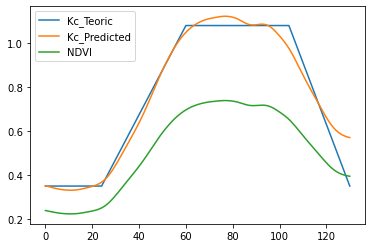

In [207]:
plotazul3.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

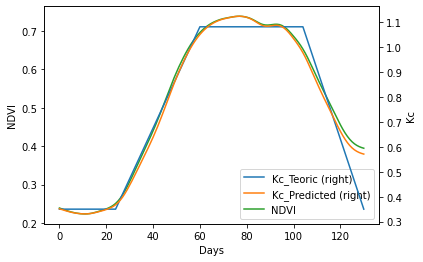

In [208]:
plt.figure()
ax = plotazul3.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [209]:
r2_score(y, lin2.predict(poly.fit_transform(X)))

0.9739977538242084

In [210]:
print(metrics.mean_absolute_error(y, lin2.predict(poly.fit_transform(X))))
print(metrics.mean_squared_error(y, lin2.predict(poly.fit_transform(X))))
print(np.sqrt(metrics.mean_absolute_error(y, lin2.predict(poly.fit_transform(X)))))

0.030974561324664307
0.002299430898482305
0.17599591280670215


In [211]:
# Visualising the Polynomial Regression results
#plt.scatter(X, y, color = 'blue')
 
#plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
#plt.title('Polynomial Regression')
#plt.xlabel('Temperature')
#plt.ylabel('Pressure')
 
#plt.show()

In [212]:
#2ºmodelo

In [213]:
X2=X.reshape(131,)

In [214]:
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(X2, y, 5))

print(r2_score(y, mymodel(X2)))

0.9830738265191892


In [215]:
print(mymodel)

       5         4       3         2
109.3 x - 297.8 x + 303 x - 142.7 x + 32.37 x - 2.472


In [216]:
from sklearn.metrics import mean_squared_error
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,mymodel(X2))))

RMSE for Polynomial Regression=> 0.038688700489143656


In [217]:
r2_score(y,mymodel(X2))

0.9830738265191892

In [218]:
print(metrics.mean_absolute_error(y,mymodel(X2)))
print(metrics.mean_squared_error(y,mymodel(X2)))
print(np.sqrt(metrics.mean_absolute_error(y,mymodel(X2))))

0.023591990733375003
0.0014968155455386647
0.15359684480279862


In [219]:
frameplotazul4 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(X2), 'NDVI': X2.reshape(131,)}
plotazul4 = pd.DataFrame(frameplotazul4)

<AxesSubplot:>

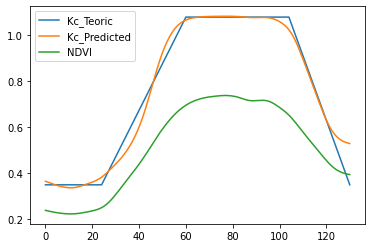

In [220]:
plotazul4.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

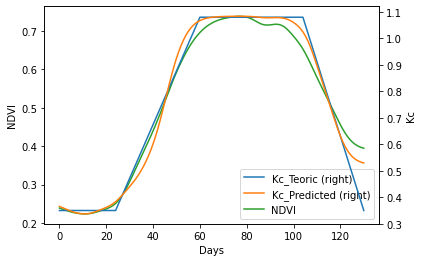

In [221]:
plt.figure()
ax = plotazul4.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

# Polynomial-Mean Test (correcto)

In [222]:
pred2 = mymodel(arraytestemean)
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [223]:
r2

0.9637299770938819

In [224]:
rmse

0.05663418609646851

In [225]:
frameplotazulteste2 = { "Kc_Theoretical": y, 'Kc_Predicted': mymodel(arraytestemean), 'NDVI': arraytestemean}
plotazulteste2 = pd.DataFrame(frameplotazulteste2)

<AxesSubplot:>

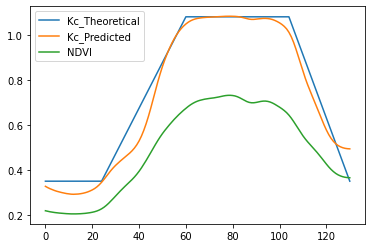

In [226]:
plotazulteste2.plot()

Text(0.5, 1.0, 'Mean No Pre-Selection (Polynomial)')

<Figure size 432x288 with 0 Axes>

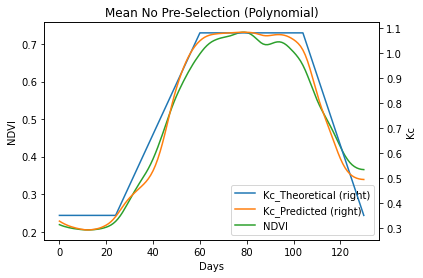

In [227]:
plt.figure()
ax = plotazulteste2.plot(secondary_y=["Kc_Theoretical","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')
ax.set_title("Mean No Pre-Selection (Polynomial)")

# Polynomial-Mean Test

In [228]:
mymodel(df_testmelhor2[5738625])

array([0.03081579, 0.03527774, 0.0457054 , 0.05747366, 0.06706802,
       0.07261892, 0.07405549, 0.0730032 , 0.07228735, 0.07463538,
       0.08020476, 0.08316287, 0.0861318 , 0.08908336, 0.09198916,
       0.0918806 , 0.09542303, 0.10228239, 0.10940447, 0.11381684,
       0.1139786 , 0.11014954, 0.10441272, 0.10041633, 0.10272624,
       0.11488354, 0.14101375, 0.18014355, 0.22738027, 0.27618582,
       0.3206808 , 0.35795481, 0.38729555, 0.40999129, 0.42830753,
       0.44457178, 0.46078902, 0.4787858 , 0.50046886, 0.52786961,
       0.56301379, 0.60343618, 0.64929437, 0.70011743, 0.75508324,
       0.81262245, 0.87028288, 0.92498839, 0.97362019, 1.01367921,
       1.04424825, 1.06423041, 1.07594075, 1.08192718, 1.08415656,
       1.08390538, 1.08202564, 1.07914977, 1.07586597, 1.07278245,
       1.07044704, 1.06916708, 1.06884854, 1.06902719, 1.06917656,
       1.06908664, 1.06894235, 1.06885139, 1.06888808, 1.06903605,
       1.06923246, 1.0694249 , 1.06960567, 1.06981186, 1.07009

In [229]:
#frameplotred4 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(red2), 'NDVI': red2.reshape(131,)}
frameplotmean = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(X2),'Kc_Predicted2':  mymodel(df_testmelhor2[5738625]), "original":X2.reshape(131,), 'NDVI': np.array(zxzxz).reshape(131,)}

plotmean = pd.DataFrame(frameplotmean)

<AxesSubplot:>

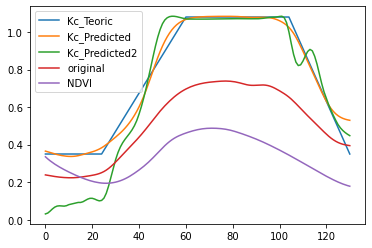

In [230]:
plotmean.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

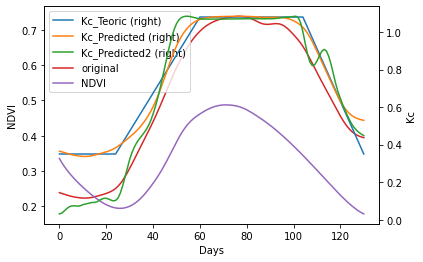

In [231]:
plt.figure()
ax = plotmean.plot(secondary_y=["Kc_Teoric","Kc_Predicted",'Kc_Predicted2'])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [232]:
from sklearn.metrics import mean_squared_error
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,mymodel(df_testmelhor2[5738625]))))

RMSE for Polynomial Regression=> 0.14139019267959463


In [233]:
r2_score(y,mymodel(df_testmelhor2[5738625]))

0.7739372140742541

In [234]:
rmselist=[]
r2list=[]
for x in df_testmelhor3.values:
    zxzxz=savgol_filter(x, 5*w+2, polyorder = 3*p, deriv=0)
    pred2 = mymodel(zxzxz)
    mse = mean_squared_error(y, pred2)
    r2 = r2_score(y, pred2)
    rmse=np.sqrt(mse)
    r2list.append(r2)
    rmselist.append(rmse)

In [235]:
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)
  
# Driver Code
averagermse = Average(rmselist)
averager2 = Average(r2list)

# Printing average of the list
print("Average of the rmse =", round(averagermse, 2))
print("Average of the r2 =", round(averager2, 2))

Average of the rmse = 0.21
Average of the r2 = 0.4


# Blue

In [236]:
blue=cluster_centers2[0].reshape(-1,1)

In [237]:
blue2=cluster_centers2[0]

## Linear

In [238]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

#X = NDVIbluesync.iloc[:,:-1].values
X=df_testmelhor3.mean().values.reshape(-1,1)
#y = NDVIbluesync.iloc[:,1].values
y=dfteoric['Kcteoric'].values
Reg = linear_model.LinearRegression()
Reg.fit(blue, y)
pred = Reg.predict(blue)
print(Reg.coef_)
print(Reg.intercept_)

[1.93044579]
-0.008946396098189036


In [239]:
Reg.score(blue, y)

0.9469243744154343

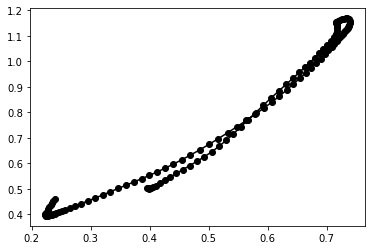

In [240]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
plt.plot(X, pred, color = 'Black', marker = 'o')

In [241]:
print(r2)
print(mse)

0.9469243744154343
0.004693584261926271


In [242]:
print(np.sqrt(mse))

0.06850973844590469


In [243]:
pred

array([0.4592423 , 0.45113533, 0.44317455, 0.43560404, 0.42843737,
       0.42183141, 0.41588096, 0.4106772 , 0.40606279, 0.40210646,
       0.39895495, 0.39646927, 0.39474468, 0.39368815, 0.39339208,
       0.39363558, 0.39440083, 0.39563415, 0.39722251, 0.39883388,
       0.40032581, 0.40201211, 0.40417868, 0.40715567, 0.41125146,
       0.41672745, 0.42359991, 0.43185003, 0.44130362, 0.45177326,
       0.46329964, 0.47562367, 0.48836973, 0.50124818, 0.51391868,
       0.52645986, 0.53913716, 0.55216702, 0.56599275, 0.58064322,
       0.59635186, 0.6134251 , 0.63198181, 0.65205384, 0.67362199,
       0.69634526, 0.7199705 , 0.74394861, 0.76790921, 0.7918308 ,
       0.81562239, 0.83917628, 0.86289694, 0.88682631, 0.91035832,
       0.93283331, 0.95413548, 0.9741375 , 0.99295168, 1.01065738,
       1.02709134, 1.04227756, 1.05613794, 1.06852462, 1.07991617,
       1.09016378, 1.09921557, 1.10703336, 1.11367866, 1.1191041 ,
       1.12341714, 1.1268391 , 1.13022293, 1.13396769, 1.13834

In [244]:
y

array([0.35      , 0.35      , 0.35      , 0.35      , 0.35      ,
       0.35      , 0.35      , 0.35      , 0.35      , 0.35      ,
       0.35      , 0.35      , 0.35      , 0.35      , 0.35      ,
       0.35      , 0.35      , 0.35      , 0.35      , 0.35      ,
       0.35      , 0.35      , 0.35      , 0.35      , 0.35      ,
       0.37027778, 0.39055556, 0.41083333, 0.43111111, 0.45138889,
       0.47166667, 0.49194444, 0.51222222, 0.5325    , 0.55277778,
       0.57305556, 0.59333333, 0.61361111, 0.63388889, 0.65416667,
       0.67444444, 0.69472222, 0.715     , 0.73527778, 0.75555556,
       0.77583333, 0.79611111, 0.81638889, 0.83666667, 0.85694444,
       0.87722222, 0.8975    , 0.91777778, 0.93805556, 0.95833333,
       0.97861111, 0.99888889, 1.01916667, 1.03944444, 1.05972222,
       1.08      , 1.08      , 1.08      , 1.08      , 1.08      ,
       1.08      , 1.08      , 1.08      , 1.08      , 1.08      ,
       1.08      , 1.08      , 1.08      , 1.08      , 1.08   

In [245]:
frameplotazul = { 'Kc_Teoric': y, 'Kc_Predicted': pred, 'NDVI': blue.reshape(131,)}

plotazul = pd.DataFrame(frameplotazul)

<AxesSubplot:>

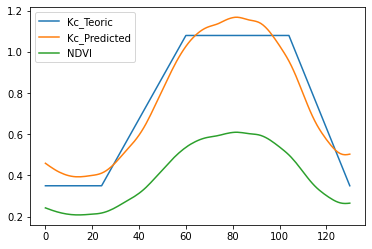

In [246]:
plotazul.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

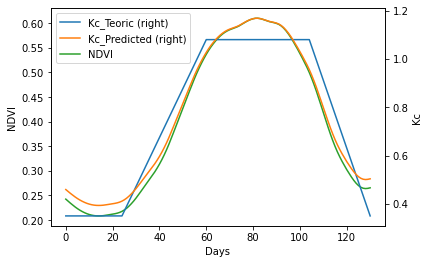

In [247]:
plt.figure()
ax = plotazul.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [248]:
#plt.scatter(y,pred)
#plt.plot(y,pred,color="red")
#plt.show()

In [249]:
#statsmodels

In [250]:
import statsmodels.api as sm
#performing the regression
Xa = sm.add_constant(blue)
result = sm.OLS(y, Xa).fit()

# Result of statsmodels 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2301.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           4.10e-84
Time:                        17:22:48   Log-Likelihood:                 165.30
No. Observations:                 131   AIC:                            -326.6
Df Residuals:                     129   BIC:                            -320.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0089      0.017     -0.518      0.6

In [251]:
result.resid.mean()

-1.1949728738331837e-16

__Explain the Statistics__

__Model : OLS : Ordinary Least Squares : One way to create a linear regression model. Minimize the dependent samples so you can estimate the unknown samples when creating a linear regression model.__

__Method : Least Squares : Fit data to the model by minimizing the residual samples__

__R-quared : Measure of how well the regression line approximates the data points. If .5 then that is a sign that half of the observed variation can be explained by the models inputs. 1 would be perfectly correlated.__

__Adj, R-squared : Reflects the fit of the model. Values range from 0 to 1, where higher values indicate a good fit.__

__F-statistic : Measures how significantly the data points fit into the regression model by measuring variation of sample means.__

__Prob (F-statistic) : Probability that the null hypothesis for the full model is true. Closer to zero the better the samples approach the model.__

__Log-Likelihood : The conditional probability that the observed data fits the model__

__AIC : Adjusts the log-likelihood based on the number of observations and complexity of the model. It focuses on the data points that best describe the data.__

__Df Residuals : Degrees of freedom of the residuals which is the difference between predicted values and the measured data.__

__BIC : We want a low BIC. It focuses on the shortest description of the data like AIC.__

__Df Model : Number of parameters in the model__

__Coefficient Constant : Is your Y intercept. If both dependent and independent coefficients are zero then the expected output would equal the constant coefficient.__

__Independent Coefficient : Represents the change of the independent variable per unit.__

__Standard Error : Accuracy of the coefficients__

__P>|t| : The P Value. A P Value less than .05 is considered statistically significant.__

__[.025 - .975] : Confidence Interval : Represents the range in which coefficients are likely to fall.__

__Omnibus : (D’Angostino’s test) : Establishes whether the samples come from a normally distributed population.__

__Durbin-Watson : Test to see if the errors are not independent. Used to find repeating patterns that may be obstructed by noise. Its value lies between 0 and 4. If greater than 2 this is a sign that relationships between two variables are going in opposite directions (negatively correlated). If less than 2 variables are positively correlated.__

__Prob(Omnibus) : Probability of Omnibus__

__Jarque-Bera : Tests whether the samples match a normal distribution. It never has a negative number and the further it gets from zero signals the data doesn't have a normal distribution.__

__Skew : Measure of the asymmetry of the probability distribution. Negative skew indicates the tail is longer on the left and the concentration of the data is on the right. Positive indicates the tail is longer on the right. 0 indicates that the tails are balanced.__

__Prob(JB) : The probability of Jarque-Bera__

__Kurtosis : Describes the shape of a probability distribution with a focus on the tails and not the peak. If the value is high that is a sign that there are more outliers. If the value is less than 3 that means there are fewer outliers. A value of 3 points towards a normal distribution. Values greater than 3 indicate more outliers.__

__Condition Number : Represents whether samples are highly related in our regression model. A large number indicates strong multicollinearity which means that independent variables are highly correlated with each other. This causes problems because a small number of samples are so dramatically different from others that results are corrupted.__

# Linear-Mean Test (correcto)

In [252]:
pred2 = Reg.predict(np.array(cluster_centersteste[1]).reshape(-1,1))
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [253]:
r2

0.9351640391476217

In [254]:
rmse

0.07572036945256164

In [255]:
frameplotazulteste2 = { 'Kc_Teoric': y, 'Kc_Predicted': pred2, 'NDVI': cluster_centersteste[1]}
plotazulteste2 = pd.DataFrame(frameplotazulteste2)

<AxesSubplot:>

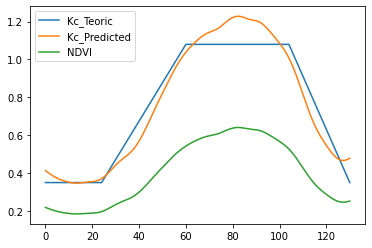

In [256]:
plotazulteste2.plot()

In [257]:
dssdc

NameError: name 'dssdc' is not defined

In [ ]:
plt.figure()
ax = plotazulteste2.plot(secondary_y=["Kc_Teoric"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

# Linear-Mean Test

In [ ]:
w = 15
p = 2

In [ ]:
zxzxz=savgol_filter(df_testmelhor2[5738625], 5*w+2, polyorder = 3*p, deriv=0)

In [ ]:
#zxzxz=savgol_filter(df_testmelhor2[1305223], 5*w+2, polyorder = 3*p, deriv=0)

In [ ]:
pred2 = Reg.predict(np.array(zxzxz).reshape(-1,1))

In [ ]:
#frameplotazul = { 'Kc_Teoric': y, 'Kc_Predicted': pred, 'NDVI': np.array(df_testmelhor2[147088]).reshape(131,),"original":X.reshape(131,),'Kc_Predicted2': pred2}
frameplotazul = { 'Kc_Teoric': y, 'Kc_Predicted': pred,'Kc_Predicted2': pred2,"original":blue2, 'NDVI': np.array(zxzxz).reshape(131,)}
plotazul = pd.DataFrame(frameplotazul)

In [ ]:
plt.figure()
ax = plotazul.plot(secondary_y=["Kc_Teoric","Kc_Predicted",'Kc_Predicted2'])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [ ]:
plotazul.plot()

In [ ]:
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)

In [ ]:
print(r2)
print(mse)

In [ ]:
print(np.sqrt(mse))

In [ ]:
rmselist=[]
r2list=[]
for x in df_testmelhor3.values:
    zxzxz=savgol_filter(x, 5*w+2, polyorder = 3*p, deriv=0)
    pred2 = Reg.predict(np.array(zxzxz).reshape(-1,1))
    mse = mean_squared_error(y, pred2)
    r2 = r2_score(y, pred2)
    rmse=np.sqrt(mse)
    r2list.append(r2)
    rmselist.append(rmse)

In [ ]:
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)
  
# Driver Code
averagermse = Average(rmselist)
averager2 = Average(r2list)

# Printing average of the list
print("Average of the rmse =", round(averagermse, 2))
print("Average of the r2 =", round(averager2, 2))

## Polinomial

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly.fit_transform(blue)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

In [ ]:
coefficient = lin2.coef_
interceptors = lin2.intercept_

In [ ]:
print(coefficient)
print(interceptors)

In [ ]:
len(X_poly)

In [ ]:
frameplotazul3 = { 'Kc_Teoric': y, 'Kc_Predicted': lin2.predict(poly.fit_transform(blue)), 'NDVI': blue.reshape(131,)}
plotazul3 = pd.DataFrame(frameplotazul3)

In [ ]:
plotazul3.plot()

In [ ]:
plt.figure()
ax = plotazul3.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [ ]:
r2_score(y, lin2.predict(poly.fit_transform(blue)))

In [ ]:
print(metrics.mean_absolute_error(y, lin2.predict(poly.fit_transform(blue))))
print(metrics.mean_squared_error(y, lin2.predict(poly.fit_transform(blue))))
print(np.sqrt(metrics.mean_absolute_error(y, lin2.predict(poly.fit_transform(blue)))))

In [ ]:
# Visualising the Polynomial Regression results
#plt.scatter(X, y, color = 'blue')
 
#plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
#plt.title('Polynomial Regression')
#plt.xlabel('Temperature')
#plt.ylabel('Pressure')
 
#plt.show()

In [ ]:
#2ºmodelo

In [ ]:
X2=X.reshape(131,)

In [ ]:
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(blue2, y, 5))

print(r2_score(y, mymodel(blue2)))

In [ ]:
print(mymodel)

In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,mymodel(blue2))))

In [ ]:
r2_score(y,mymodel(blue2))

In [ ]:
print(metrics.mean_absolute_error(y,mymodel(blue2)))
print(metrics.mean_squared_error(y,mymodel(blue2)))
print(np.sqrt(metrics.mean_absolute_error(y,mymodel(blue2))))

In [ ]:
frameplotazul4 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(blue2), 'NDVI': blue2.reshape(131,)}
plotazul4 = pd.DataFrame(frameplotazul4)

In [ ]:
plotazul4.plot()

In [ ]:
plt.figure()
ax = plotazul4.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

# Polynomial-Mean Test (correcto)

In [ ]:
pred2 = mymodel(cluster_centersteste[1])
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [ ]:
r2

In [ ]:
rmse

In [ ]:
frameplotazulteste2 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(cluster_centersteste[1]), 'NDVI': cluster_centersteste[1]}
plotazulteste2 = pd.DataFrame(frameplotazulteste2)

In [ ]:
plotazulteste2.plot()

In [ ]:
plt.figure()
ax = plotazulteste2.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

# Polynomial-Mean Test

In [ ]:
mymodel(df_testmelhor2[5738625])

In [ ]:
#frameplotred4 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(red2), 'NDVI': red2.reshape(131,)}
frameplotblue = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(blue2),'Kc_Predicted2':  mymodel(df_testmelhor2[5738625]), "original":blue2, 'NDVI': np.array(zxzxz).reshape(131,)}

plotblue = pd.DataFrame(frameplotblue)

In [ ]:
plotblue.plot()

In [ ]:
plt.figure()
ax = plotblue.plot(secondary_y=["Kc_Teoric","Kc_Predicted",'Kc_Predicted2'])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,mymodel(df_testmelhor2[5738625]))))

In [ ]:
r2_score(y,mymodel(df_testmelhor2[5738625]))

In [ ]:
rmselist=[]
r2list=[]
for x in df_testmelhor3.values:
    zxzxz=savgol_filter(x, 5*w+2, polyorder = 3*p, deriv=0)
    pred2 = mymodel(zxzxz)
    mse = mean_squared_error(y, pred2)
    r2 = r2_score(y, pred2)
    rmse=np.sqrt(mse)
    r2list.append(r2)
    rmselist.append(rmse)

In [ ]:
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)
  
# Driver Code
averagermse = Average(rmselist)
averager2 = Average(r2list)

# Printing average of the list
print("Average of the rmse =", round(averagermse, 2))
print("Average of the r2 =", round(averager2, 2))

# Red

In [ ]:
red=cluster_centers2[1].reshape(-1,1)

In [ ]:
red2=cluster_centers2[1]

## Linear

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

#X = NDVIbluesync.iloc[:,:-1].values
X=df_testmelhor3.mean().values.reshape(-1,1)
#y = NDVIbluesync.iloc[:,1].values
y=dfteoric['Kcteoric'].values
Reg = linear_model.LinearRegression()
Reg.fit(red, y)
pred = Reg.predict(red)
print(Reg.coef_)
print(Reg.intercept_)

In [ ]:
Reg.score(red, y)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
plt.plot(X, pred, color = 'Black', marker = 'o')

In [ ]:
print(r2)
print(mse)

In [ ]:
print(np.sqrt(mse))

In [ ]:
pred

In [ ]:
y

In [ ]:
frameplotred = { 'Kc_Teoric': y, 'Kc_Predicted': pred, 'NDVI': red.reshape(131,)}

plotred = pd.DataFrame(frameplotazul)

In [ ]:
plotred.plot()

In [ ]:
plt.figure()
ax = plotred.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [ ]:
#plt.scatter(y,pred)
#plt.plot(y,pred,color="red")
#plt.show()

In [ ]:
#statsmodels

In [ ]:
import statsmodels.api as sm
#performing the regression
Xa = sm.add_constant(red)
result = sm.OLS(y, Xa).fit()

# Result of statsmodels 
print(result.summary())

In [ ]:
result.resid.mean()

__Explain the Statistics__

__Model : OLS : Ordinary Least Squares : One way to create a linear regression model. Minimize the dependent samples so you can estimate the unknown samples when creating a linear regression model.__

__Method : Least Squares : Fit data to the model by minimizing the residual samples__

__R-quared : Measure of how well the regression line approximates the data points. If .5 then that is a sign that half of the observed variation can be explained by the models inputs. 1 would be perfectly correlated.__

__Adj, R-squared : Reflects the fit of the model. Values range from 0 to 1, where higher values indicate a good fit.__

__F-statistic : Measures how significantly the data points fit into the regression model by measuring variation of sample means.__

__Prob (F-statistic) : Probability that the null hypothesis for the full model is true. Closer to zero the better the samples approach the model.__

__Log-Likelihood : The conditional probability that the observed data fits the model__

__AIC : Adjusts the log-likelihood based on the number of observations and complexity of the model. It focuses on the data points that best describe the data.__

__Df Residuals : Degrees of freedom of the residuals which is the difference between predicted values and the measured data.__

__BIC : We want a low BIC. It focuses on the shortest description of the data like AIC.__

__Df Model : Number of parameters in the model__

__Coefficient Constant : Is your Y intercept. If both dependent and independent coefficients are zero then the expected output would equal the constant coefficient.__

__Independent Coefficient : Represents the change of the independent variable per unit.__

__Standard Error : Accuracy of the coefficients__

__P>|t| : The P Value. A P Value less than .05 is considered statistically significant.__

__[.025 - .975] : Confidence Interval : Represents the range in which coefficients are likely to fall.__

__Omnibus : (D’Angostino’s test) : Establishes whether the samples come from a normally distributed population.__

__Durbin-Watson : Test to see if the errors are not independent. Used to find repeating patterns that may be obstructed by noise. Its value lies between 0 and 4. If greater than 2 this is a sign that relationships between two variables are going in opposite directions (negatively correlated). If less than 2 variables are positively correlated.__

__Prob(Omnibus) : Probability of Omnibus__

__Jarque-Bera : Tests whether the samples match a normal distribution. It never has a negative number and the further it gets from zero signals the data doesn't have a normal distribution.__

__Skew : Measure of the asymmetry of the probability distribution. Negative skew indicates the tail is longer on the left and the concentration of the data is on the right. Positive indicates the tail is longer on the right. 0 indicates that the tails are balanced.__

__Prob(JB) : The probability of Jarque-Bera__

__Kurtosis : Describes the shape of a probability distribution with a focus on the tails and not the peak. If the value is high that is a sign that there are more outliers. If the value is less than 3 that means there are fewer outliers. A value of 3 points towards a normal distribution. Values greater than 3 indicate more outliers.__

__Condition Number : Represents whether samples are highly related in our regression model. A large number indicates strong multicollinearity which means that independent variables are highly correlated with each other. This causes problems because a small number of samples are so dramatically different from others that results are corrupted.__

# Linear-Mean Test (correcto)

In [ ]:
pred2 = Reg.predict(np.array(cluster_centersteste[0]).reshape(-1,1))
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [ ]:
r2

In [ ]:
rmse

In [ ]:
frameplotazulteste2 = { 'Kc_Teoric': y, 'Kc_Predicted': pred2, 'NDVI': cluster_centersteste[0]}
plotazulteste2 = pd.DataFrame(frameplotazulteste2)

In [ ]:
plotazulteste2.plot()

In [ ]:
plt.figure()
ax = plotazulteste2.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

# Linear-Mean Test

In [ ]:
w = 15
p = 2

In [ ]:
zxzxz=savgol_filter(df_testmelhor2[5738625], 5*w+2, polyorder = 3*p, deriv=0)

In [ ]:
#zxzxz=savgol_filter(df_testmelhor2[1305223], 5*w+2, polyorder = 3*p, deriv=0)

In [ ]:
pred2 = Reg.predict(np.array(zxzxz).reshape(-1,1))

In [ ]:
#frameplotazul = { 'Kc_Teoric': y, 'Kc_Predicted': pred, 'NDVI': np.array(df_testmelhor2[147088]).reshape(131,),"original":X.reshape(131,),'Kc_Predicted2': pred2}
frameplotred = { 'Kc_Teoric': y, 'Kc_Predicted': pred,'Kc_Predicted2': pred2,"original":red2, 'NDVI': np.array(zxzxz).reshape(131,)}
plotred = pd.DataFrame(frameplotred)

In [ ]:
plt.figure()
ax = plotred.plot(secondary_y=["Kc_Teoric","Kc_Predicted",'Kc_Predicted2'])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [ ]:
plotred.plot()

In [ ]:
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)

In [ ]:
print(r2)
print(mse)

In [ ]:
print(np.sqrt(mse))

In [ ]:
rmselist=[]
r2list=[]
for x in df_testmelhor3.values:
    zxzxz=savgol_filter(x, 5*w+2, polyorder = 3*p, deriv=0)
    pred2 = Reg.predict(np.array(zxzxz).reshape(-1,1))
    mse = mean_squared_error(y, pred2)
    r2 = r2_score(y, pred2)
    rmse=np.sqrt(mse)
    r2list.append(r2)
    rmselist.append(rmse)

In [ ]:
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)
  
# Driver Code
averagermse = Average(rmselist)
averager2 = Average(r2list)

# Printing average of the list
print("Average of the rmse =", round(averagermse, 2))
print("Average of the r2 =", round(averager2, 2))

## Polinomial

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly.fit_transform(red)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

In [ ]:
coefficient = lin2.coef_
interceptors = lin2.intercept_

In [ ]:
print(coefficient)
print(interceptors)

In [ ]:
len(X_poly)

In [ ]:
frameplotred3 = { 'Kc_Teoric': y, 'Kc_Predicted': lin2.predict(poly.fit_transform(red)), 'NDVI': red.reshape(131,)}
plotred3 = pd.DataFrame(frameplotazul3)

In [ ]:
plotred3.plot()

In [ ]:
plt.figure()
ax = plotred3.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [ ]:
r2_score(y, lin2.predict(poly.fit_transform(red)))

In [ ]:
print(metrics.mean_absolute_error(y, lin2.predict(poly.fit_transform(red))))
print(metrics.mean_squared_error(y, lin2.predict(poly.fit_transform(red))))
print(np.sqrt(metrics.mean_absolute_error(y, lin2.predict(poly.fit_transform(red)))))

In [ ]:
# Visualising the Polynomial Regression results
#plt.scatter(X, y, color = 'blue')
 
#plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
#plt.title('Polynomial Regression')
#plt.xlabel('Temperature')
#plt.ylabel('Pressure')
 
#plt.show()

In [ ]:
#2ºmodelo

In [ ]:
X2=X.reshape(131,)

In [ ]:
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(red2, y, 5))

print(r2_score(y, mymodel(red2)))

In [ ]:
print(mymodel)

In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,mymodel(red2))))

In [ ]:
r2_score(y,mymodel(red2))

In [ ]:
print(metrics.mean_absolute_error(y,mymodel(red2)))
print(metrics.mean_squared_error(y,mymodel(red2)))
print(np.sqrt(metrics.mean_absolute_error(y,mymodel(red2))))

In [ ]:
frameplotred4 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(red2), 'NDVI': red2.reshape(131,)}
plotred4 = pd.DataFrame(frameplotazul4)

In [ ]:
plotred4.plot()

In [ ]:
plt.figure()
ax = plotred4.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

# Polynomial-Mean Test (correcto)

In [ ]:
pred2 = mymodel(cluster_centersteste[0])
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [ ]:
r2

In [ ]:
rmse

In [ ]:
frameplotazulteste2 = { "Kc_Theoretical": y, 'Kc_Predicted': mymodel(cluster_centersteste[0]), 'NDVI': cluster_centersteste[0]}
plotazulteste2 = pd.DataFrame(frameplotazulteste2)

In [ ]:
plotazulteste2.plot()

In [ ]:
plt.figure()
ax = plotazulteste2.plot(secondary_y=["Kc_Theoretical","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')
ax.set_title("K-Means No Pre-Selection (Polynomial)")

# Polynomial-Mean Test

In [ ]:
mymodel(df_testmelhor2[5738625])

In [ ]:
#frameplotred4 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(red2), 'NDVI': red2.reshape(131,)}
frameplotred = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(red2),'Kc_Predicted2':  mymodel(df_testmelhor2[5738625]), "original":red2, 'NDVI': np.array(zxzxz).reshape(131,)}

plotred = pd.DataFrame(frameplotred)

In [ ]:
plotred.plot()

In [ ]:
plt.figure()
ax = plotred.plot(secondary_y=["Kc_Teoric","Kc_Predicted",'Kc_Predicted2'])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,mymodel(df_testmelhor2[5738625]))))

In [ ]:
r2_score(y,mymodel(df_testmelhor2[5738625]))

In [ ]:
rmselist=[]
r2list=[]
for x in df_testmelhor3.values:
    zxzxz=savgol_filter(x, 5*w+2, polyorder = 3*p, deriv=0)
    pred2 = mymodel(zxzxz)
    mse = mean_squared_error(y, pred2)
    r2 = r2_score(y, pred2)
    rmse=np.sqrt(mse)
    r2list.append(r2)
    rmselist.append(rmse)

In [ ]:
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)
  
# Driver Code
averagermse = Average(rmselist)
averager2 = Average(r2list)

# Printing average of the list
print("Average of the rmse =", round(averagermse, 2))
print("Average of the r2 =", round(averager2, 2))

In [ ]:
sdfvdsxv

In [ ]:
df_testmelhor2

In [ ]:
w = 15
p = 2

In [ ]:
zxzxz=savgol_filter(df_testmelhor2[5738625], 5*w+2, polyorder = 3*p, deriv=0)

In [ ]:
pred2 = Reg.predict(np.array(zxzxz).reshape(-1,1))

In [ ]:
#frameplotazul = { 'Kc_Teoric': y, 'Kc_Predicted': pred, 'NDVI': np.array(df_testmelhor2[147088]).reshape(131,),"original":X.reshape(131,),'Kc_Predicted2': pred2}
frameplotazul = { 'Kc_Teoric': y, 'Kc_Predicted': pred,'Kc_Predicted2': pred2,"original":X.reshape(131,), 'NDVI': np.array(zxzxz).reshape(131,)}
plotazul = pd.DataFrame(frameplotazul)

In [ ]:
plt.figure()
ax = plotazul.plot(secondary_y=["Kc_Teoric","Kc_Predicted",'Kc_Predicted2'])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [ ]:
plotazul.plot()